# Exploratory Data Analysis - Landline Contract Dataset

This notebook performs an exploratory data analysis on the landline contract dataset for users who subscribed in January 2016 or January 2017.

## Objectives:
1. **Churn Analysis** - Understand user retention and churn patterns
2. **Billing Analysis** - Analyze revenue patterns and billing evolution
3. **General Data Exploration** - Understand the dataset structure and quality


In [5]:
# Import necessary libraries
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading


In [6]:
path_to_data = 'data.yaml'
print("Loading data file, wait...")
with open(path_to_data, 'r') as data_file_content:
    users_list = yaml.load(data_file_content, Loader=yaml.FullLoader)
print("Data load complete!")

# Convert to pandas DataFrame for easier analysis
df = pd.DataFrame(users_list)
print(f"\nTotal number of users: {len(df)}")
print(f"\nDataset shape: {df.shape}")
df.head()

Loading data file, wait...
Data load complete!

Total number of users: 20000

Dataset shape: (20000, 9)


,acquisition_channel,cancel_year_month,duration_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
0,phone,2019-07,42,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,1810
1,online,2018-07,18,adsl,False,#11:Freebox Revolution with TV 3999eur,2017-01,11.4:Freebox Revolution with TV 3999eur,670
2,phone,2018-03,26,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,1030
3,phone,N/A,N/A,fiber,False,#11:Freebox Revolution with TV 3999eur,2017-01,11.4:Freebox Revolution with TV 3999eur,2470
4,phone,2019-02,37,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,2060


## 2. Initial Data Exploration


In [7]:
# Basic information about the dataset
print("=== Dataset Info ===")
print(df.info())
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Data Types ===")
print(df.dtypes)


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   acquisition_channel  20000 non-null  object
 1   cancel_year_month    20000 non-null  object
 2   duration_month       20000 non-null  object
 3   fiber_or_adsl        20000 non-null  object
 4   has_retention        20000 non-null  bool  
 5   offer                20000 non-null  object
 6   recruit_year_month   20000 non-null  object
 7   sub_offer            20000 non-null  object
 8   total_bill           20000 non-null  int64 
dtypes: bool(1), int64(1), object(7)
memory usage: 1.2+ MB
None

=== Missing Values ===
acquisition_channel    0
cancel_year_month      0
duration_month         0
fiber_or_adsl          0
has_retention          0
offer                  0
recruit_year_month     0
sub_offer              0
total_bill             0
dtype: int64

=== D

In [8]:
# Check for 'N/A' values (which are strings, not actual NaN)
print("=== 'N/A' Values Check ===")
for col in df.columns:
    na_count = (df[col] == 'N/A').sum()
    if na_count > 0:
        print(f"{col}: {na_count} 'N/A' values ({na_count/len(df)*100:.2f}%)")

# Display basic statistics for numerical columns
print("\n=== Numerical Summary ===")
print(df.describe())


=== 'N/A' Values Check ===
cancel_year_month: 6569 'N/A' values (32.84%)
duration_month: 6569 'N/A' values (32.84%)

=== Numerical Summary ===
         total_bill
count  20000.000000
mean    1612.201500
std     1279.222431
min        0.000000
25%      480.000000
50%     1465.000000
75%     2580.000000
max    43150.000000


In [24]:
# Explore categorical variables
print("=== Categorical Variables Distribution ===\n")
for col in ['recruit_year_month', 'fiber_or_adsl', 'has_retention', 'acquisition_channel', 'offer', 'sub_offer']:
    print(f"\n{col}:")
    print(df[col].value_counts().head(10))
    print("-" * 50)


=== Categorical Variables Distribution ===


recruit_year_month:
recruit_year_month
2016-01    10452
2017-01     9548
Name: count, dtype: int64
--------------------------------------------------

fiber_or_adsl:
fiber_or_adsl
adsl     15046
fiber     4954
Name: count, dtype: int64
--------------------------------------------------

has_retention:
has_retention
False    19491
True       509
Name: count, dtype: int64
--------------------------------------------------

acquisition_channel:
acquisition_channel
phone                    6904
online                   6151
outgoing call - promo    4663
pos                      2175
mail                       81
outgoing call              23
other                       3
Name: count, dtype: int64
--------------------------------------------------

offer:
offer
#11:Freebox Revolution with TV 3999eur    14185
#8:Freebox Revolution 2999eur              5815
Name: count, dtype: int64
--------------------------------------------------

sub_offer:
sub

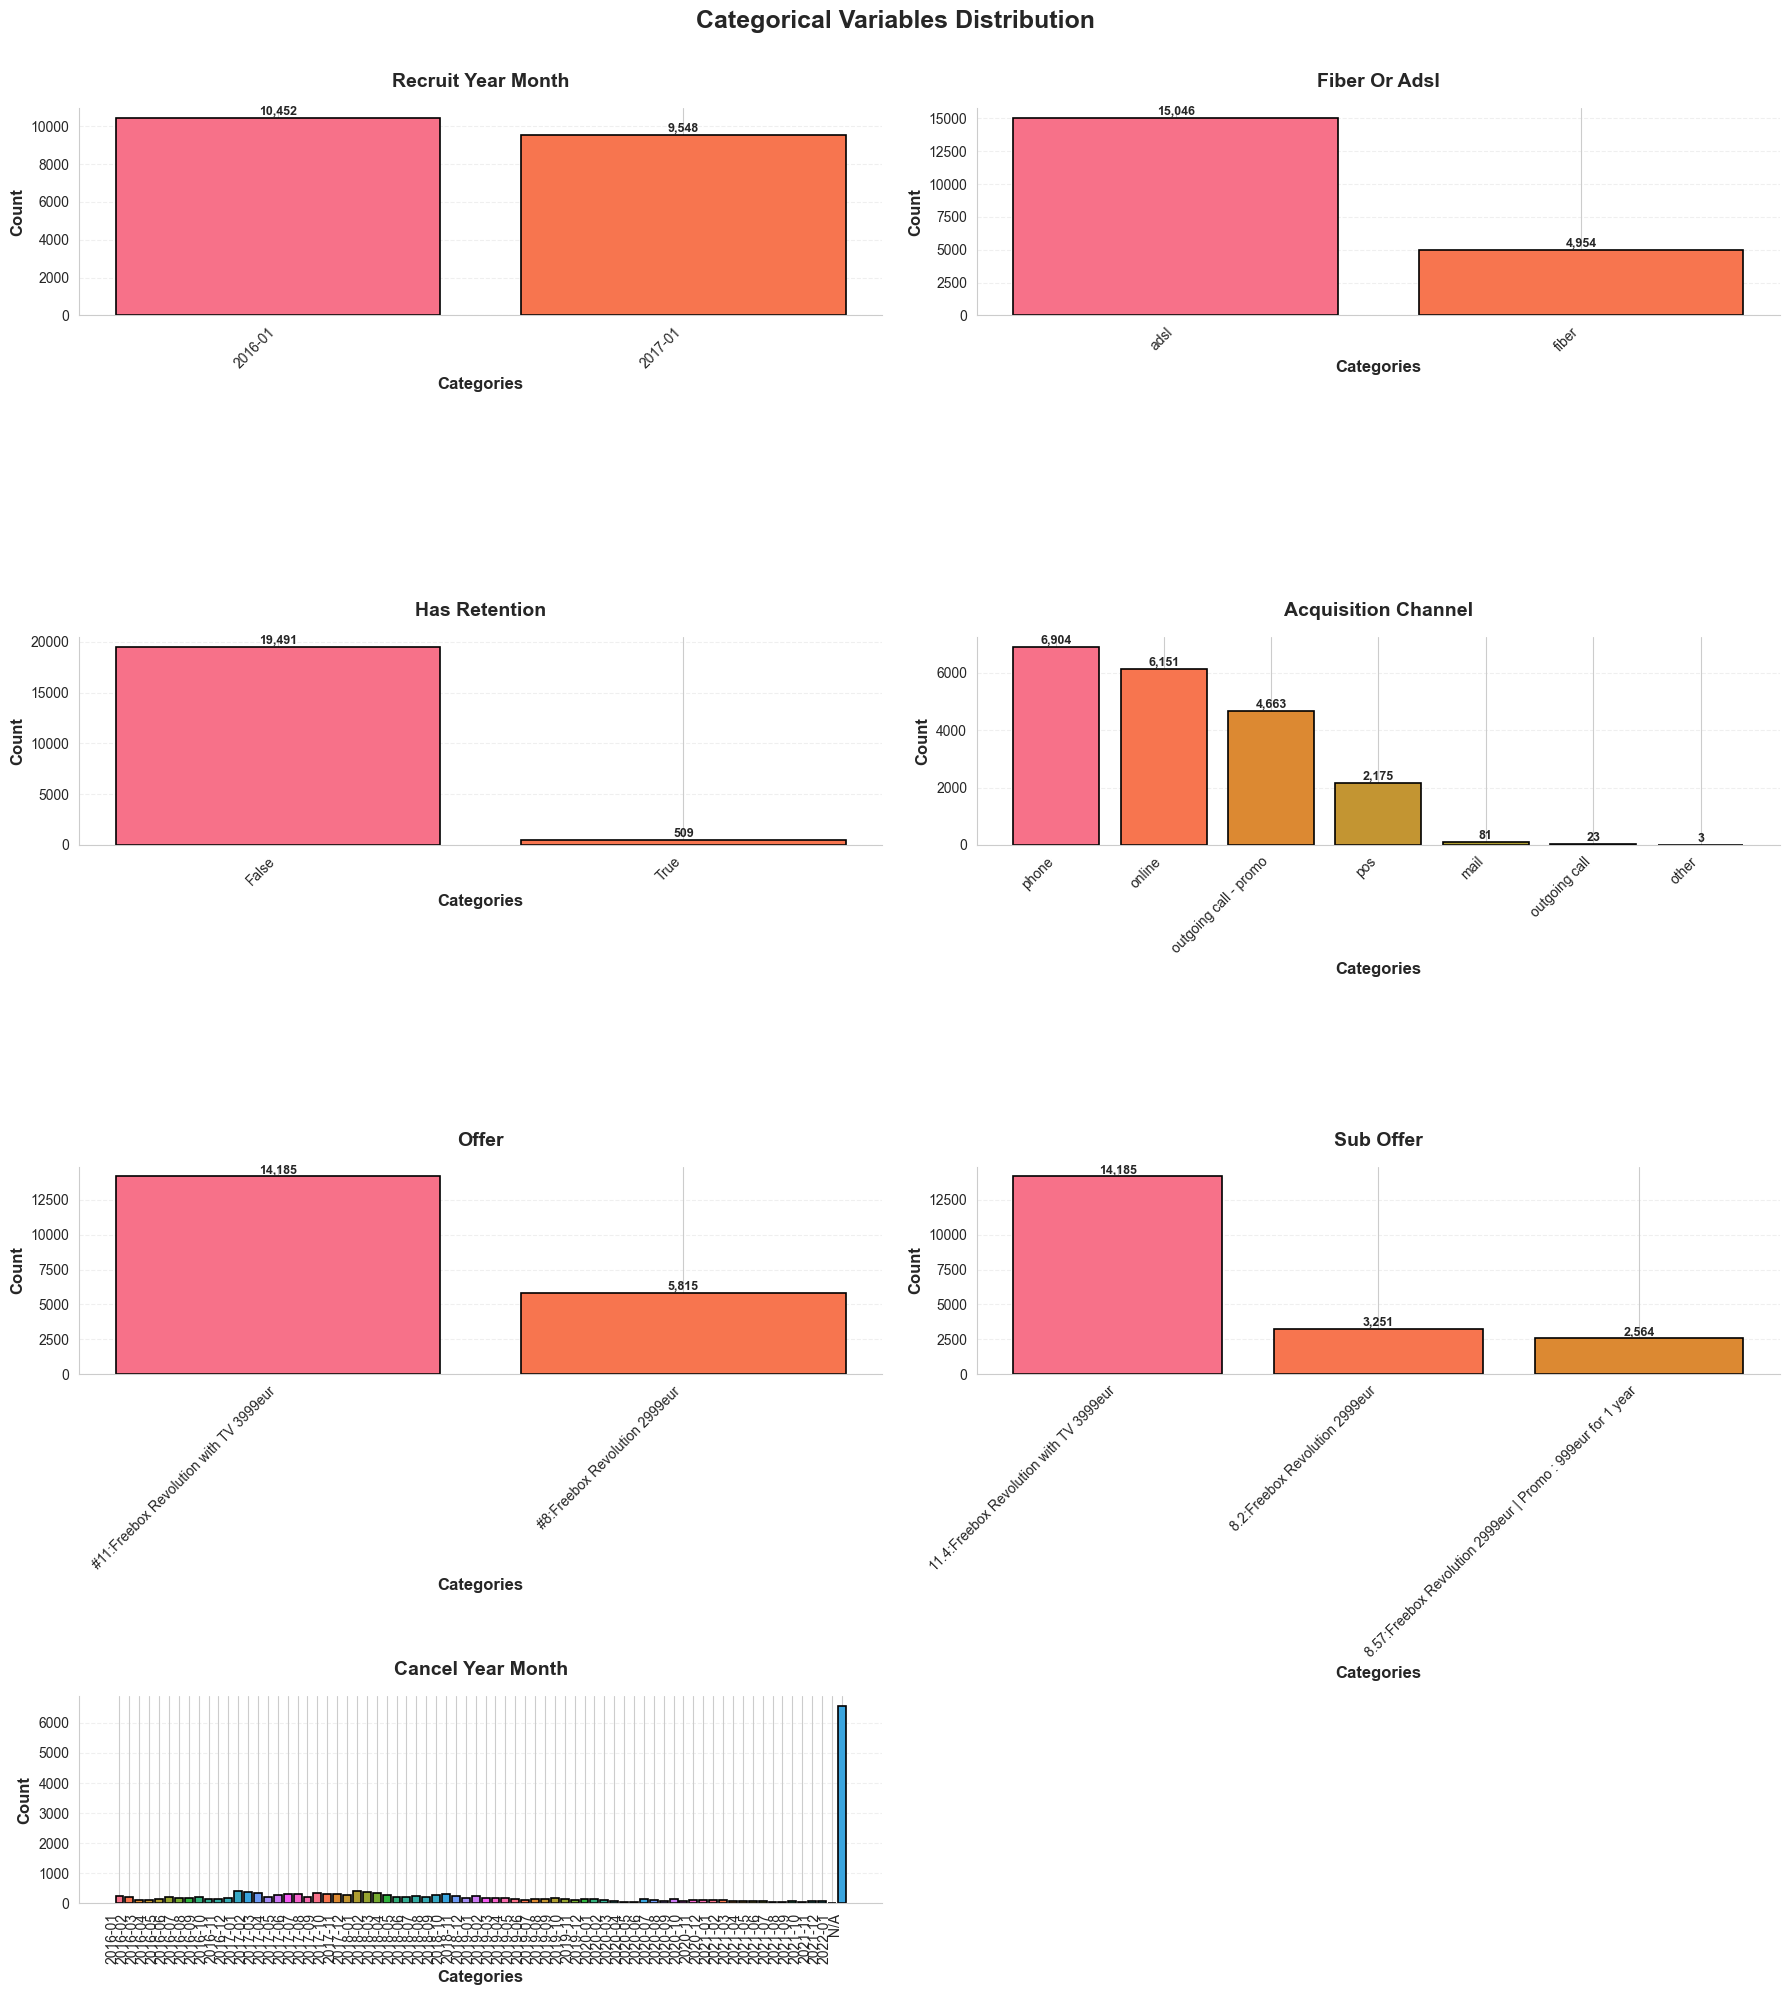

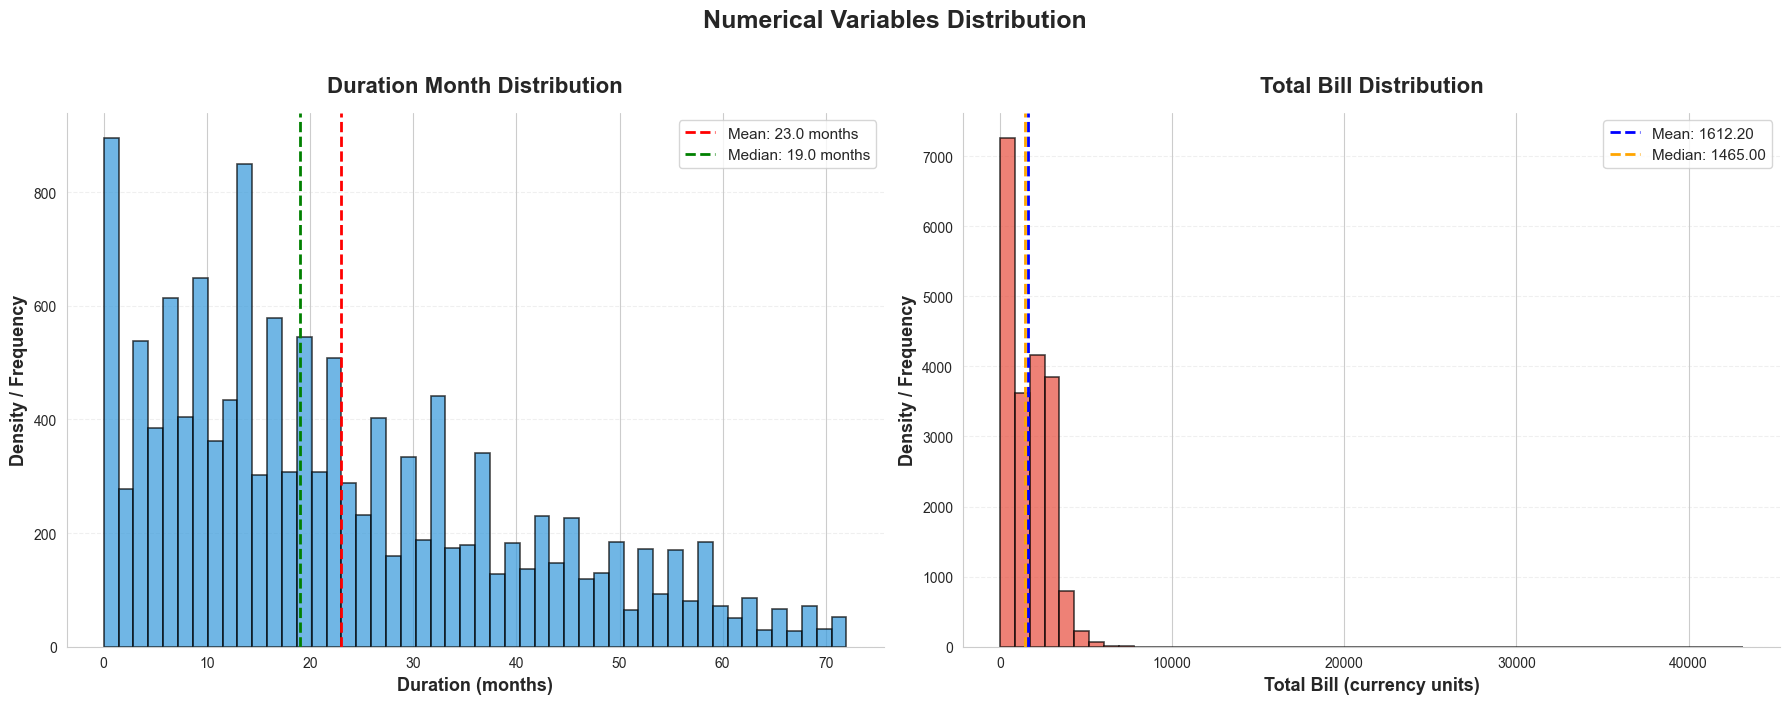


=== Summary Statistics ===

Categorical Variables:

recruit_year_month:
  Unique values: 2
  Most common: 2016-01 (10452 occurrences)
  Missing values: 0

fiber_or_adsl:
  Unique values: 2
  Most common: adsl (15046 occurrences)
  Missing values: 0

has_retention:
  Unique values: 2
  Most common: False (19491 occurrences)
  Missing values: 0

acquisition_channel:
  Unique values: 7
  Most common: phone (6904 occurrences)
  Missing values: 0

offer:
  Unique values: 2
  Most common: #11:Freebox Revolution with TV 3999eur (14185 occurrences)
  Missing values: 0

sub_offer:
  Unique values: 3
  Most common: 11.4:Freebox Revolution with TV 3999eur (14185 occurrences)
  Missing values: 0

cancel_year_month:
  Unique values: 74
  Most common: N/A (6569 occurrences)
  Missing values: 0


Numerical Variables:

duration_month:
  Count: 13431
  Mean: 22.96
  Median: 19.00
  Std Dev: 17.33
  Min: 0.00
  Max: 72.00
  Missing/Invalid values: 6569
--------------------------------------------------

In [29]:
# Categorical variables
categorical_vars = ['recruit_year_month', 'fiber_or_adsl', 'has_retention', 
                    'acquisition_channel', 'offer', 'sub_offer', 'cancel_year_month']

# Create a figure with subplots for categorical variables (4 rows x 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

# Color palette for consistent styling
colors = sns.color_palette("husl", 20)

for idx, col in enumerate(categorical_vars):
    ax = axes[idx]
    
    # Get value counts
    # For cancel_year_month, show all values (including N/A)
    if col == 'cancel_year_month':
        value_counts = df[col].value_counts().sort_index()
        # Put N/A at the end if it exists
        if 'N/A' in value_counts.index:
            na_count = value_counts['N/A']
            value_counts = value_counts.drop('N/A').sort_index()
            value_counts['N/A'] = na_count
    else:
        value_counts = df[col].value_counts().head(10)
    
    # Create bar plot
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                  color=colors[:len(value_counts)], edgecolor='black', linewidth=1.2)
    
    # Customize the plot
    ax.set_title(f'{col.replace("_", " ").title()}', 
                fontsize=14, fontweight='bold', pad=15)
    ax.set_xlabel('Categories', fontsize=12, fontweight='bold')
    ax.set_ylabel('Count', fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(value_counts)))
    
    # Rotate labels more for cancel_year_month since it has many categories
    rotation = 90 if col == 'cancel_year_month' else 45
    ax.set_xticklabels(value_counts.index, rotation=rotation, ha='right', fontsize=10)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels on top of bars (only if not too many bars)
    if len(value_counts) <= 15:
        for i, (bar, value) in enumerate(zip(bars, value_counts.values)):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{value:,}',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Hide the last empty subplot
axes[7].axis('off')

plt.suptitle('Categorical Variables Distribution', 
             fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

# Create histograms for numerical variables (1 row x 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Histogram for duration_month
ax1 = axes[0]
# Convert to numeric, coercing errors to NaN, then drop NaN values
duration_data = pd.to_numeric(df['duration_month'], errors='coerce').dropna()
if len(duration_data) > 0:
    ax1.hist(duration_data, bins=50, color='#3498db', edgecolor='black', linewidth=1.2, alpha=0.7)
    ax1.set_title('Duration Month Distribution', fontsize=16, fontweight='bold', pad=15)
    ax1.set_xlabel('Duration (months)', fontsize=13, fontweight='bold')
    ax1.set_ylabel('Density / Frequency', fontsize=13, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    ax1.axvline(duration_data.mean(), color='red', linestyle='--', linewidth=2, 
               label=f'Mean: {duration_data.mean():.1f} months')
    ax1.axvline(duration_data.median(), color='green', linestyle='--', linewidth=2, 
               label=f'Median: {duration_data.median():.1f} months')
    ax1.legend(fontsize=11)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
else:
    ax1.text(0.5, 0.5, 'No valid numeric data', ha='center', va='center', 
            transform=ax1.transAxes, fontsize=14)
    ax1.set_title('Duration Month Distribution', fontsize=16, fontweight='bold', pad=15)

# Histogram for total_bill
ax2 = axes[1]
# Convert to numeric, coercing errors to NaN, then drop NaN values
bill_data = pd.to_numeric(df['total_bill'], errors='coerce').dropna()
if len(bill_data) > 0:
    ax2.hist(bill_data, bins=50, color='#e74c3c', edgecolor='black', linewidth=1.2, alpha=0.7)
    ax2.set_title('Total Bill Distribution', fontsize=16, fontweight='bold', pad=15)
    ax2.set_xlabel('Total Bill (currency units)', fontsize=13, fontweight='bold')
    ax2.set_ylabel('Density / Frequency', fontsize=13, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    ax2.axvline(bill_data.mean(), color='blue', linestyle='--', linewidth=2, 
               label=f'Mean: {bill_data.mean():.2f}')
    ax2.axvline(bill_data.median(), color='orange', linestyle='--', linewidth=2, 
               label=f'Median: {bill_data.median():.2f}')
    ax2.legend(fontsize=11)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
else:
    ax2.text(0.5, 0.5, 'No valid numeric data', ha='center', va='center', 
            transform=ax2.transAxes, fontsize=14)
    ax2.set_title('Total Bill Distribution', fontsize=16, fontweight='bold', pad=15)

plt.suptitle('Numerical Variables Distribution', 
             fontsize=18, fontweight='bold', y=1.0)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# Print summary statistics
print("\n=== Summary Statistics ===\n")
print("Categorical Variables:")
for col in categorical_vars:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    if df[col].nunique() > 0:
        print(f"  Most common: {df[col].mode()[0]} ({df[col].value_counts().iloc[0]} occurrences)")
    print(f"  Missing values: {df[col].isna().sum()}")

print("\n" + "="*50)
print("\nNumerical Variables:")
for col in ['duration_month', 'total_bill']:
    print(f"\n{col}:")
    # Convert to numeric for statistics
    data = pd.to_numeric(df[col], errors='coerce').dropna()
    if len(data) > 0:
        print(f"  Count: {len(data)}")
        print(f"  Mean: {data.mean():.2f}")
        print(f"  Median: {data.median():.2f}")
        print(f"  Std Dev: {data.std():.2f}")
        print(f"  Min: {data.min():.2f}")
        print(f"  Max: {data.max():.2f}")
    print(f"  Missing/Invalid values: {df[col].isna().sum() + (len(df[col]) - len(data))}")
    print("-" * 50)

## 3. Data Preprocessing

We need to handle the 'N/A' values and convert date strings to datetime objects for better analysis.


In [10]:
# Create a copy for processing
df_processed = df.copy()

# Handle 'N/A' values - convert to NaN for cancel_year_month and duration_month
df_processed['cancel_year_month'] = df_processed['cancel_year_month'].replace('N/A', np.nan)
df_processed['duration_month'] = df_processed['duration_month'].replace('N/A', np.nan)

# Convert duration_month to numeric
df_processed['duration_month'] = pd.to_numeric(df_processed['duration_month'], errors='coerce')

# Create a churn indicator (1 if churned, 0 if active)
df_processed['churned'] = df_processed['cancel_year_month'].notna().astype(int)

# Parse dates
df_processed['recruit_date'] = pd.to_datetime(df_processed['recruit_year_month'], format='%Y-%m')
df_processed['cancel_date'] = pd.to_datetime(df_processed['cancel_year_month'], format='%Y-%m', errors='coerce')

# Calculate reference date (January 13, 2022)
reference_date = pd.to_datetime('2022-01-13')

# Calculate tenure (months from recruitment to reference date or cancellation)
def calculate_tenure(row):
    if pd.notna(row['cancel_date']):
        return (row['cancel_date'] - row['recruit_date']).days / 30.44
    else:
        return (reference_date - row['recruit_date']).days / 30.44

df_processed['tenure_months'] = df_processed.apply(calculate_tenure, axis=1)

# For churned users, use duration_month if available, otherwise calculate from dates
mask_churned = df_processed['churned'] == 1
df_processed.loc[mask_churned, 'tenure_months'] = df_processed.loc[mask_churned, 'duration_month'].fillna(
    df_processed.loc[mask_churned, 'tenure_months']
)

print("Data preprocessing complete!")
print(f"\nActive users: {(df_processed['churned'] == 0).sum()}")
print(f"Churned users: {(df_processed['churned'] == 1).sum()}")


Data preprocessing complete!

Active users: 6569
Churned users: 13431


## 4. Churn Analysis

### 4.1. Initial Cohort Sizes


=== Initial Cohort Sizes ===
recruit_year_month
2016-01    10452
2017-01     9548
Name: count, dtype: int64


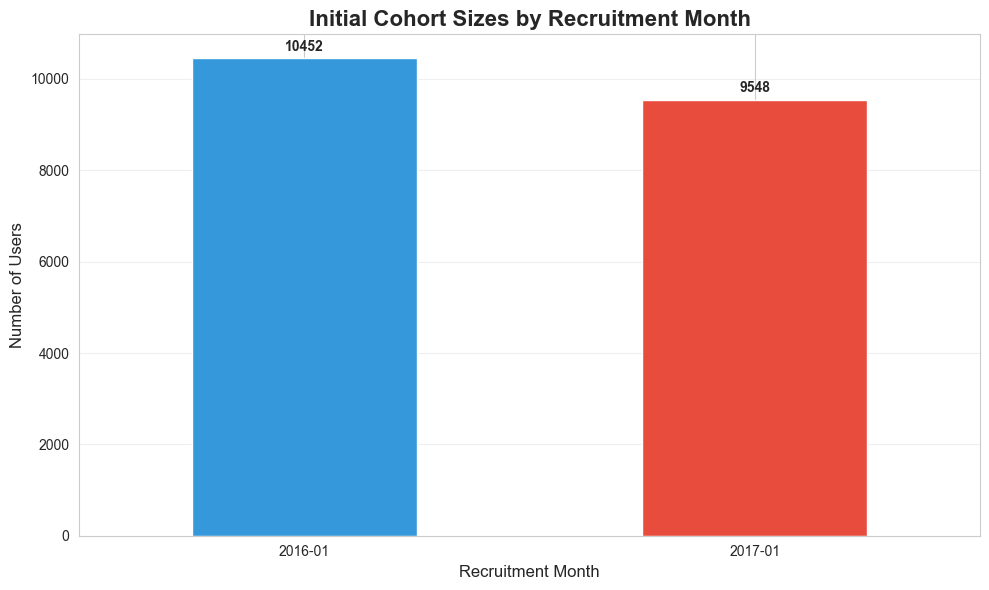


Total users in 2016-01 cohort: 10452
Total users in 2017-01 cohort: 9548


In [11]:
# Question 1: How many users are there initially in each cohort?
cohort_sizes = df_processed['recruit_year_month'].value_counts().sort_index()
print("=== Initial Cohort Sizes ===")
print(cohort_sizes)

# Visualization
plt.figure(figsize=(10, 6))
cohort_sizes.plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Initial Cohort Sizes by Recruitment Month', fontsize=16, fontweight='bold')
plt.xlabel('Recruitment Month', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(cohort_sizes.values):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nTotal users in 2016-01 cohort: {cohort_sizes['2016-01']}")
print(f"Total users in 2017-01 cohort: {cohort_sizes['2017-01']}")


### 4.2. Users Remaining in January 2022


=== Users Remaining in January 2022 ===
Total remaining: 6569 (32.84%)
Total churned: 13431 (67.16%)

=== By Cohort ===

2016-01:
  Initial: 10452
  Remaining: 3257 (31.16%)
  Churned: 7195

2017-01:
  Initial: 9548
  Remaining: 3312 (34.69%)
  Churned: 6236


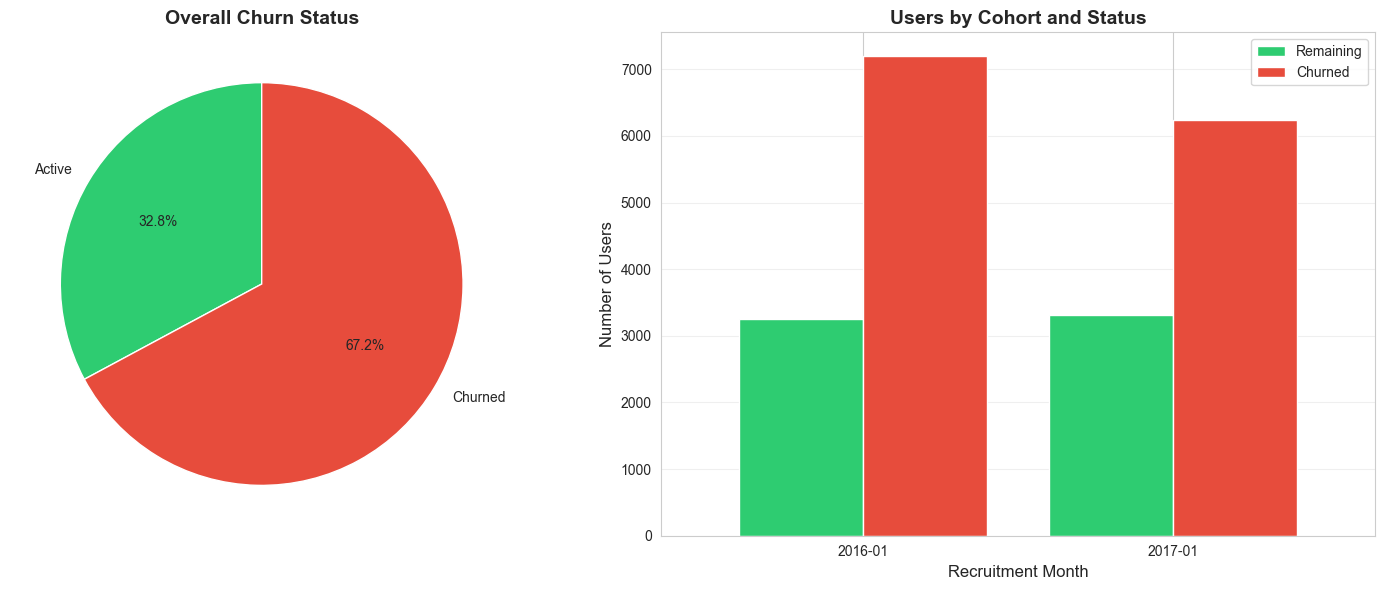

In [12]:
# Question 2: How many users remain in January 2022?
users_remaining = df_processed[df_processed['churned'] == 0]
users_churned = df_processed[df_processed['churned'] == 1]

remaining_by_cohort = users_remaining['recruit_year_month'].value_counts().sort_index()
churned_by_cohort = users_churned['recruit_year_month'].value_counts().sort_index()

print("=== Users Remaining in January 2022 ===")
print(f"Total remaining: {len(users_remaining)} ({len(users_remaining)/len(df_processed)*100:.2f}%)")
print(f"Total churned: {len(users_churned)} ({len(users_churned)/len(df_processed)*100:.2f}%)")

print("\n=== By Cohort ===")
for cohort in ['2016-01', '2017-01']:
    cohort_total = cohort_sizes[cohort]
    cohort_remaining = remaining_by_cohort.get(cohort, 0)
    cohort_churned = churned_by_cohort.get(cohort, 0)
    retention_rate = (cohort_remaining / cohort_total) * 100
    print(f"\n{cohort}:")
    print(f"  Initial: {cohort_total}")
    print(f"  Remaining: {cohort_remaining} ({retention_rate:.2f}%)")
    print(f"  Churned: {cohort_churned}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
axes[0].pie([len(users_remaining), len(users_churned)], 
            labels=['Active', 'Churned'],
            autopct='%1.1f%%',
            colors=['#2ecc71', '#e74c3c'],
            startangle=90)
axes[0].set_title('Overall Churn Status', fontsize=14, fontweight='bold')

# Bar chart by cohort
cohort_df = pd.DataFrame({
    'Initial': cohort_sizes,
    'Remaining': remaining_by_cohort,
    'Churned': churned_by_cohort
}).fillna(0)

cohort_df[['Remaining', 'Churned']].plot(kind='bar', ax=axes[1], 
                                          color=['#2ecc71', '#e74c3c'],
                                          width=0.8)
axes[1].set_title('Users by Cohort and Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Recruitment Month', fontsize=12)
axes[1].set_ylabel('Number of Users', fontsize=12)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


### 4.3. Monthly Churn Distribution


=== Monthly Churn Distribution ===
Total months with churn: 73

Top 10 months by churn:
cancel_year_month
2021-04    85
2021-05    72
2021-06    74
2021-07    64
2021-08    60
2021-09    78
2021-10    62
2021-11    70
2021-12    74
2022-01    29
dtype: int64


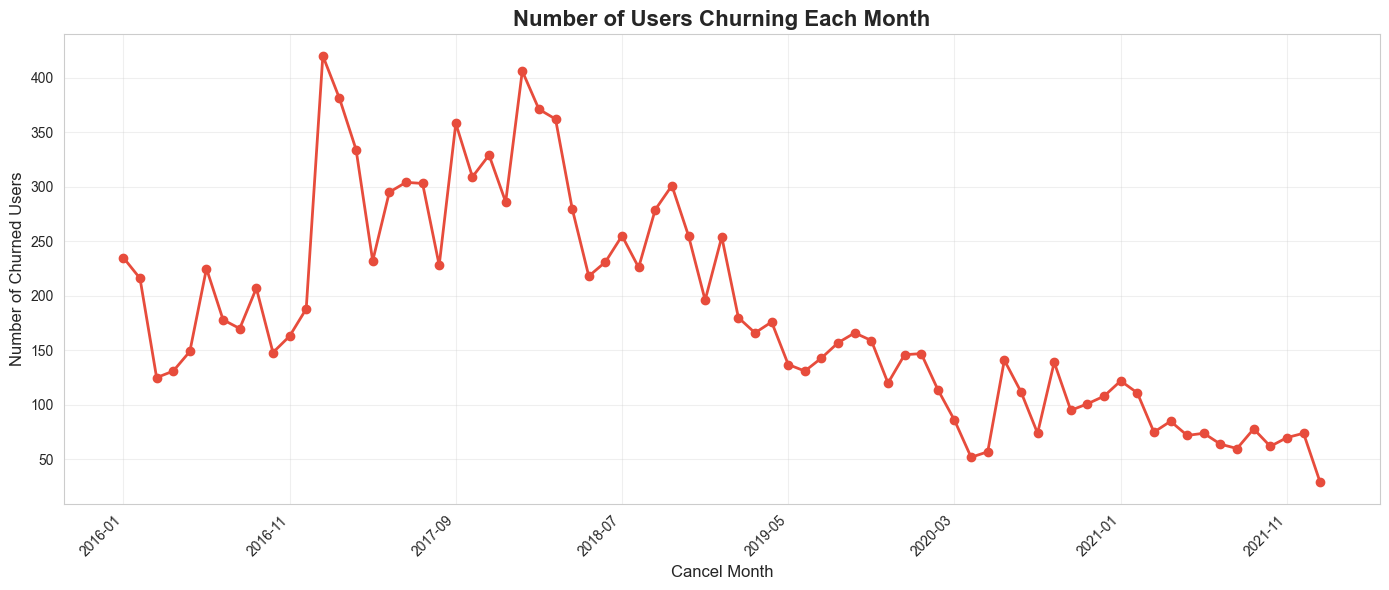


=== Summary Statistics ===
Mean monthly churn: 183.99
Median monthly churn: 163.00
Max monthly churn: 420 (month: 2017-01)
Min monthly churn: 29 (month: 2022-01)


In [13]:
# Question 2a: How many users churn each month?
# Group churned users by cancel month
monthly_churn = df_processed[df_processed['churned'] == 1].groupby('cancel_year_month').size().sort_index()

print("=== Monthly Churn Distribution ===")
print(f"Total months with churn: {len(monthly_churn)}")
print("\nTop 10 months by churn:")
print(monthly_churn.tail(10))

# Visualization
plt.figure(figsize=(14, 6))
monthly_churn.plot(kind='line', marker='o', color='#e74c3c', linewidth=2, markersize=6)
plt.title('Number of Users Churning Each Month', fontsize=16, fontweight='bold')
plt.xlabel('Cancel Month', fontsize=12)
plt.ylabel('Number of Churned Users', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n=== Summary Statistics ===")
print(f"Mean monthly churn: {monthly_churn.mean():.2f}")
print(f"Median monthly churn: {monthly_churn.median():.2f}")
print(f"Max monthly churn: {monthly_churn.max()} (month: {monthly_churn.idxmax()})")
print(f"Min monthly churn: {monthly_churn.min()} (month: {monthly_churn.idxmin()})")


### 4.4. Survival Analysis - Share of Remaining Users by Tenure


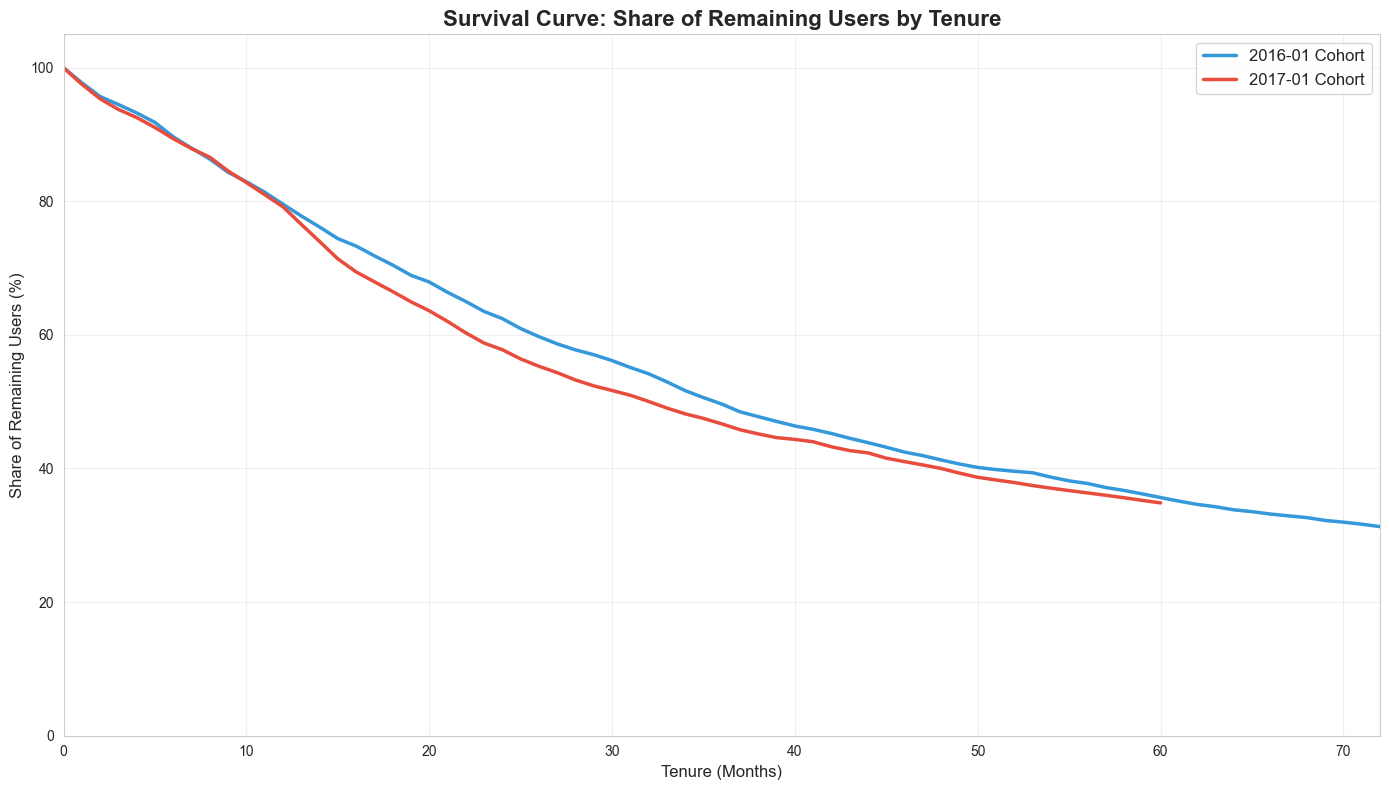

=== Survival Analysis Summary ===

2016-01 Cohort - 6-year retention: 31.30%
2017-01 Cohort - 5-year retention: 34.84%


In [14]:
# Question 2b: Plot the share of remaining users as a function of tenure
# For each month of tenure, calculate the percentage of users still active

def calculate_survival_curve(cohort_df, cohort_name):
    """Calculate survival curve for a specific cohort"""
    # Get users from this cohort
    cohort_users = cohort_df[cohort_df['recruit_year_month'] == cohort_name].copy()
    
    # For each tenure month, calculate how many users are still active
    max_tenure = int(cohort_users['tenure_months'].max())
    survival_data = []
    
    for month in range(0, max_tenure + 1):
        # Users who haven't churned by this month
        active_at_month = cohort_users[
            (cohort_users['tenure_months'] >= month) | 
            ((cohort_users['churned'] == 0) & (cohort_users['tenure_months'] >= month))
        ]
        active_count = len(active_at_month)
        total_cohort = len(cohort_users)
        survival_rate = (active_count / total_cohort) * 100 if total_cohort > 0 else 0
        survival_data.append({
            'tenure_month': month,
            'survival_rate': survival_rate,
            'active_count': active_count,
            'total_count': total_cohort
        })
    
    return pd.DataFrame(survival_data)

# Calculate survival curves for each cohort
survival_2016 = calculate_survival_curve(df_processed, '2016-01')
survival_2017 = calculate_survival_curve(df_processed, '2017-01')

# Visualization
plt.figure(figsize=(14, 8))
plt.plot(survival_2016['tenure_month'], survival_2016['survival_rate'], 
         label='2016-01 Cohort', linewidth=2.5, color='#3498db')
plt.plot(survival_2017['tenure_month'], survival_2017['survival_rate'], 
         label='2017-01 Cohort', linewidth=2.5, color='#e74c3c')

plt.title('Survival Curve: Share of Remaining Users by Tenure', 
          fontsize=16, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Share of Remaining Users (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, max(survival_2016['tenure_month'].max(), survival_2017['tenure_month'].max()))
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

print("=== Survival Analysis Summary ===")
print(f"\n2016-01 Cohort - 6-year retention: {survival_2016[survival_2016['tenure_month'] == 72]['survival_rate'].values[0]:.2f}%")
print(f"2017-01 Cohort - 5-year retention: {survival_2017[survival_2017['tenure_month'] == 60]['survival_rate'].values[0]:.2f}%")


### 4.5. Survival Analysis by User Groups


=== Survival Analysis by Connection Type ===


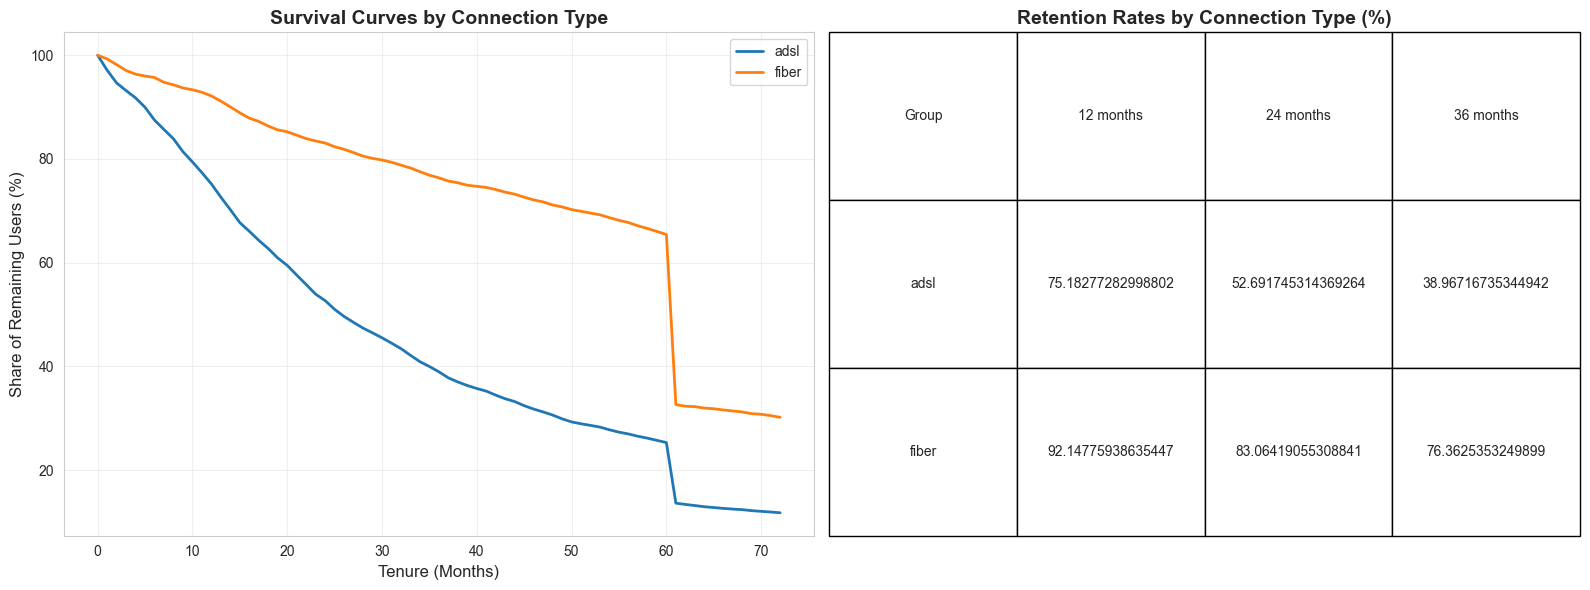


=== Survival Analysis by Acquisition Channel ===


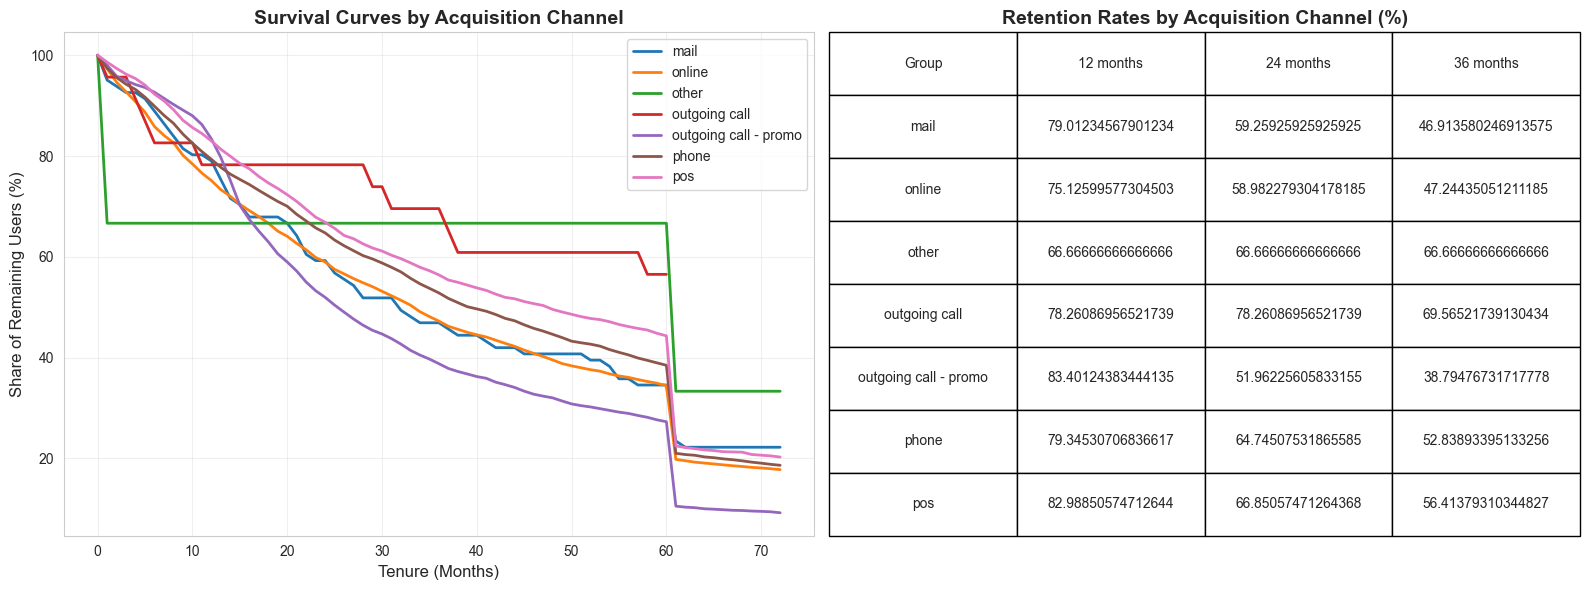


=== Survival Analysis by Retention Offer ===


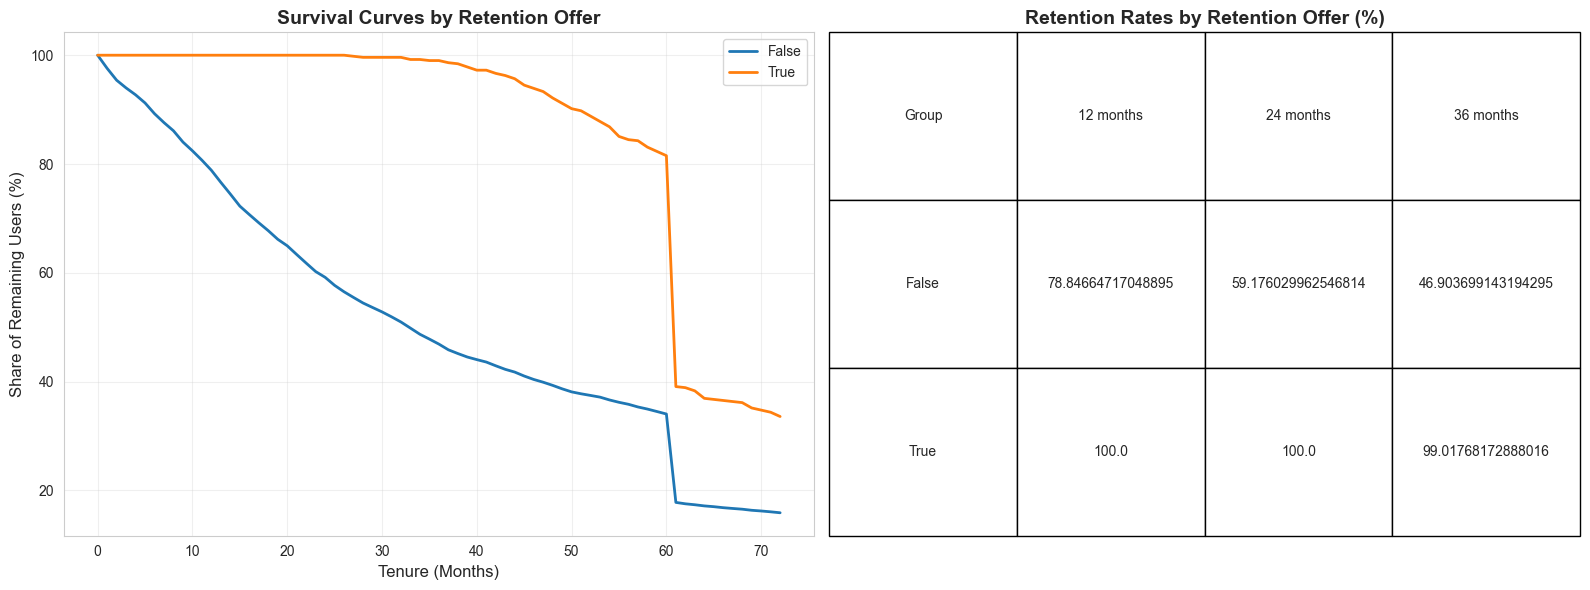

In [15]:
# Question 2c: Any difference between user groups?
# Analyze survival by different segments

def survival_by_group(df, group_col, group_name):
    """Calculate survival rates by a grouping column"""
    groups = df[group_col].unique()
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Initialize retention_data dictionary
    retention_data = {
        'Group': [],
        '12 months': [],
        '24 months': [],
        '36 months': []
    }
    
    for idx, group in enumerate(sorted(groups)):
        group_df = df[df[group_col] == group]
        
        # Calculate survival curve
        max_tenure = int(group_df['tenure_months'].max())
        survival_data = []
        
        for month in range(0, max_tenure + 1, 1):
            active_count = len(group_df[group_df['tenure_months'] >= month])
            total_count = len(group_df)
            survival_rate = (active_count / total_count) * 100 if total_count > 0 else 0
            survival_data.append({'tenure_month': month, 'survival_rate': survival_rate})
        
        survival_df = pd.DataFrame(survival_data)
        
        # Plot
        axes[0].plot(survival_df['tenure_month'], survival_df['survival_rate'], 
                    label=f'{group}', linewidth=2)
        
        # Calculate retention rate at different time points
        retention_12m = survival_df[survival_df['tenure_month'] == 12]['survival_rate'].values[0] if len(survival_df[survival_df['tenure_month'] == 12]) > 0 else 0
        retention_24m = survival_df[survival_df['tenure_month'] == 24]['survival_rate'].values[0] if len(survival_df[survival_df['tenure_month'] == 24]) > 0 else 0
        retention_36m = survival_df[survival_df['tenure_month'] == 36]['survival_rate'].values[0] if len(survival_df[survival_df['tenure_month'] == 36]) > 0 else 0
        
        # Append to retention_data
        retention_data['Group'].append(group)
        retention_data['12 months'].append(retention_12m)
        retention_data['24 months'].append(retention_24m)
        retention_data['36 months'].append(retention_36m)
    
    axes[0].set_title(f'Survival Curves by {group_name}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Tenure (Months)', fontsize=12)
    axes[0].set_ylabel('Share of Remaining Users (%)', fontsize=12)
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Retention rates table
    retention_df = pd.DataFrame(retention_data)
    axes[1].axis('tight')
    axes[1].axis('off')
    table = axes[1].table(cellText=retention_df.values, colLabels=retention_df.columns,
                         cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    axes[1].set_title(f'Retention Rates by {group_name} (%)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return retention_df

# Analyze by Fiber/ADSL
print("=== Survival Analysis by Connection Type ===")
retention_fiber = survival_by_group(df_processed, 'fiber_or_adsl', 'Connection Type')

# Analyze by Acquisition Channel
print("\n=== Survival Analysis by Acquisition Channel ===")
retention_channel = survival_by_group(df_processed, 'acquisition_channel', 'Acquisition Channel')

# Analyze by Retention Offer
print("\n=== Survival Analysis by Retention Offer ===")
retention_retention = survival_by_group(df_processed, 'has_retention', 'Retention Offer')


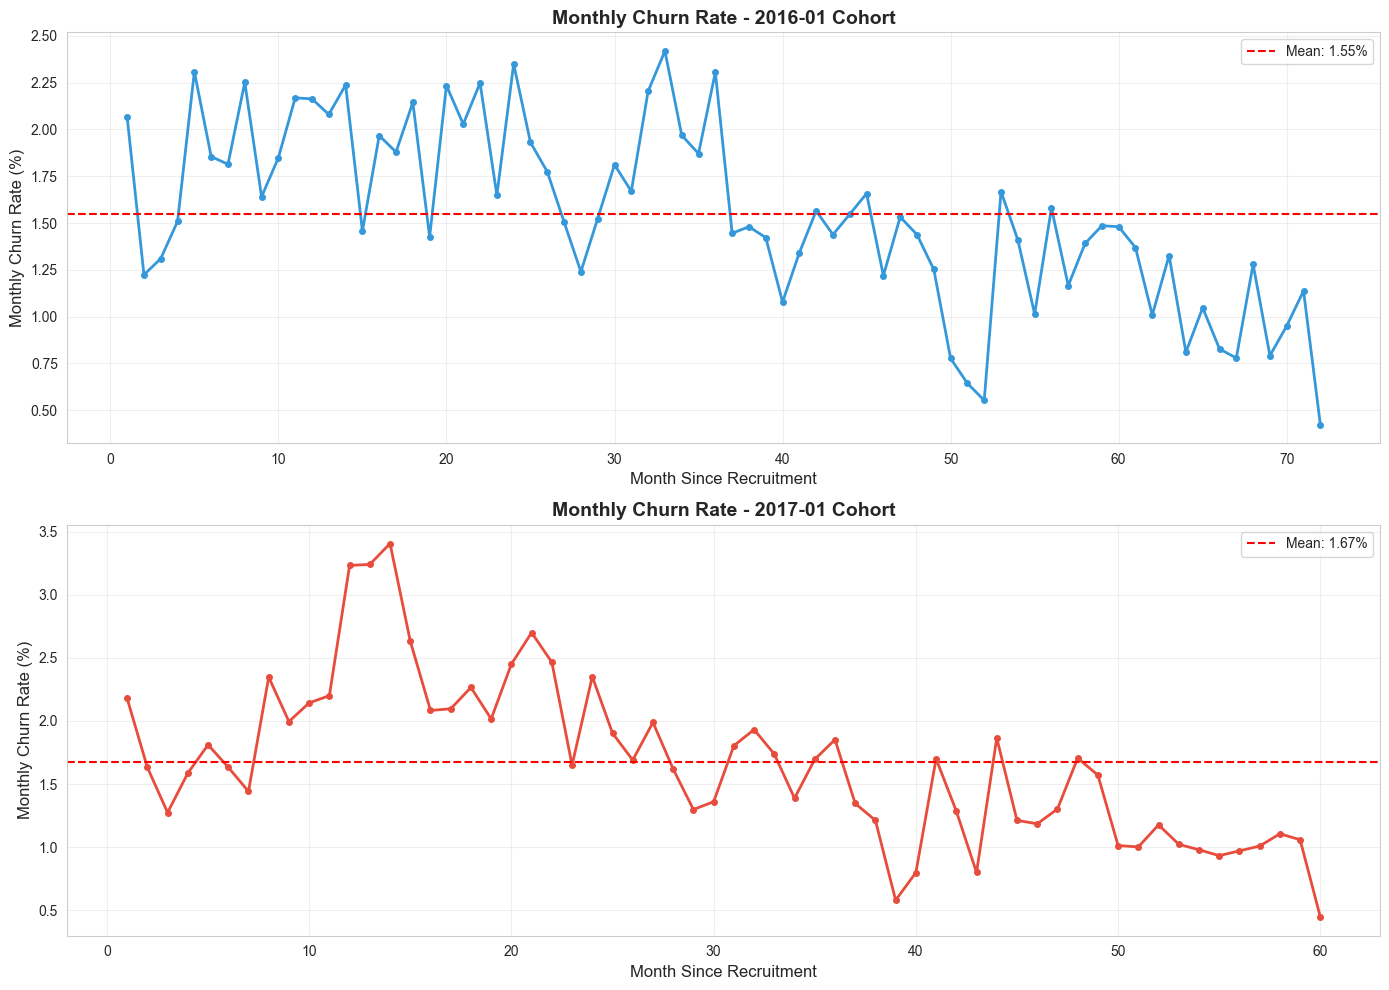

=== Monthly Churn Rate Summary ===

2016-01 Cohort:
  Mean monthly churn rate: 1.547%
  Median monthly churn rate: 1.507%
  Max monthly churn rate: 2.419% (month 33)

2017-01 Cohort:
  Mean monthly churn rate: 1.673%
  Median monthly churn rate: 1.642%
  Max monthly churn rate: 3.406% (month 14)

=== Early vs Late Churn (2016 Cohort) ===
  Mean churn rate (first 12 months): 1.847%
  Mean churn rate (after 12 months): 1.488%


In [16]:
# Question 3: Compute the monthly churn rate
# Monthly churn rate = Users churning in month M / Users remaining at end of M-1

def calculate_monthly_churn_rate(df, cohort_name):
    """Calculate monthly churn rate for a specific cohort"""
    cohort_df = df[df['recruit_year_month'] == cohort_name].copy()
    
    # Calculate churn events by month since recruitment
    churn_by_month = cohort_df[cohort_df['churned'] == 1].copy()
    churn_by_month['months_since_recruitment'] = churn_by_month['duration_month'].round().astype(int)
    
    # Count churn events by month
    churn_counts = churn_by_month['months_since_recruitment'].value_counts().sort_index()
    
    # Calculate users at risk (survivors at beginning of each month)
    max_month = int(cohort_df['tenure_months'].max())
    churn_rates = []
    
    for month in range(1, max_month + 1):
        # Users at risk at start of month (those with tenure >= month-1)
        users_at_risk = len(cohort_df[cohort_df['tenure_months'] >= (month - 1)])
        
        # Users churning in this month
        users_churning = churn_counts.get(month, 0)
        
        if users_at_risk > 0:
            churn_rate = (users_churning / users_at_risk) * 100
        else:
            churn_rate = 0
        
        churn_rates.append({
            'month': month,
            'churn_rate': churn_rate,
            'users_churning': users_churning,
            'users_at_risk': users_at_risk
        })
    
    return pd.DataFrame(churn_rates)

# Calculate for both cohorts
churn_rate_2016 = calculate_monthly_churn_rate(df_processed, '2016-01')
churn_rate_2017 = calculate_monthly_churn_rate(df_processed, '2017-01')

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 2016 Cohort
axes[0].plot(churn_rate_2016['month'], churn_rate_2016['churn_rate'], 
            marker='o', linewidth=2, markersize=4, color='#3498db')
axes[0].set_title('Monthly Churn Rate - 2016-01 Cohort', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month Since Recruitment', fontsize=12)
axes[0].set_ylabel('Monthly Churn Rate (%)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=churn_rate_2016['churn_rate'].mean(), color='r', linestyle='--', 
                label=f'Mean: {churn_rate_2016["churn_rate"].mean():.2f}%')
axes[0].legend()

# 2017 Cohort
axes[1].plot(churn_rate_2017['month'], churn_rate_2017['churn_rate'], 
            marker='o', linewidth=2, markersize=4, color='#e74c3c')
axes[1].set_title('Monthly Churn Rate - 2017-01 Cohort', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month Since Recruitment', fontsize=12)
axes[1].set_ylabel('Monthly Churn Rate (%)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=churn_rate_2017['churn_rate'].mean(), color='r', linestyle='--', 
                label=f'Mean: {churn_rate_2017["churn_rate"].mean():.2f}%')
axes[1].legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("=== Monthly Churn Rate Summary ===")
print("\n2016-01 Cohort:")
print(f"  Mean monthly churn rate: {churn_rate_2016['churn_rate'].mean():.3f}%")
print(f"  Median monthly churn rate: {churn_rate_2016['churn_rate'].median():.3f}%")
print(f"  Max monthly churn rate: {churn_rate_2016['churn_rate'].max():.3f}% (month {churn_rate_2016.loc[churn_rate_2016['churn_rate'].idxmax(), 'month']})")

print("\n2017-01 Cohort:")
print(f"  Mean monthly churn rate: {churn_rate_2017['churn_rate'].mean():.3f}%")
print(f"  Median monthly churn rate: {churn_rate_2017['churn_rate'].median():.3f}%")
print(f"  Max monthly churn rate: {churn_rate_2017['churn_rate'].max():.3f}% (month {churn_rate_2017.loc[churn_rate_2017['churn_rate'].idxmax(), 'month']})")

# Early vs Late churn comparison
early_months = churn_rate_2016['month'] <= 12
late_months = churn_rate_2016['month'] > 12
print("\n=== Early vs Late Churn (2016 Cohort) ===")
print(f"  Mean churn rate (first 12 months): {churn_rate_2016[early_months]['churn_rate'].mean():.3f}%")
print(f"  Mean churn rate (after 12 months): {churn_rate_2016[late_months]['churn_rate'].mean():.3f}%")


=== Total Bill Statistics ===
count    20000.000000
mean      1612.201500
std       1279.222431
min          0.000000
25%        480.000000
50%       1465.000000
75%       2580.000000
max      43150.000000
Name: total_bill, dtype: float64


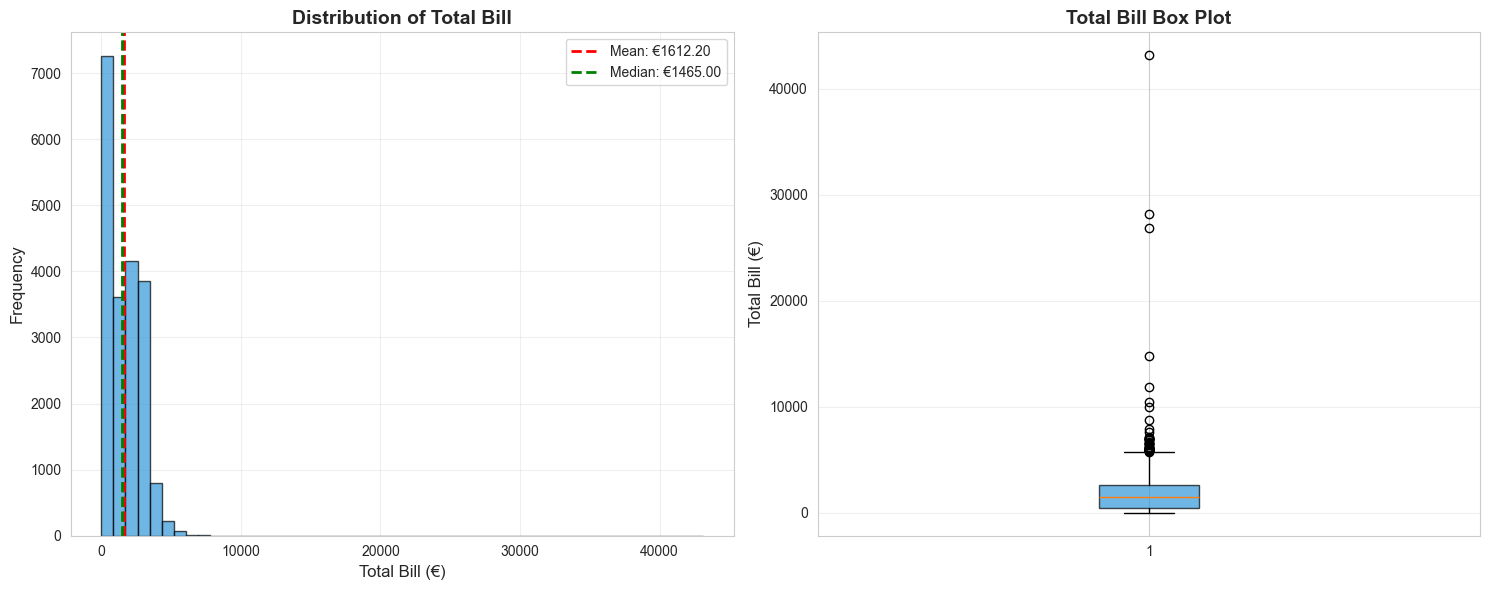


Average total bill: €1612.20
Median total bill: €1465.00
Standard deviation: €1279.22


In [17]:
# Question 1: What is the average total bill?
print("=== Total Bill Statistics ===")
print(df_processed['total_bill'].describe())

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axes[0].hist(df_processed['total_bill'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(df_processed['total_bill'].mean(), color='r', linestyle='--', linewidth=2, 
                label=f'Mean: €{df_processed["total_bill"].mean():.2f}')
axes[0].axvline(df_processed['total_bill'].median(), color='g', linestyle='--', linewidth=2, 
                label=f'Median: €{df_processed["total_bill"].median():.2f}')
axes[0].set_title('Distribution of Total Bill', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Bill (€)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df_processed['total_bill'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#3498db', alpha=0.7))
axes[1].set_title('Total Bill Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Bill (€)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\nAverage total bill: €{df_processed['total_bill'].mean():.2f}")
print(f"Median total bill: €{df_processed['total_bill'].median():.2f}")
print(f"Standard deviation: €{df_processed['total_bill'].std():.2f}")


### 5.2. Average Total Bill by User Groups



=== Total Bill Statistics by Cohort ===
                       mean  median      std  count
recruit_year_month                                 
2016-01             1749.53  1580.0  1352.12  10452
2017-01             1461.87  1330.0  1176.16   9548


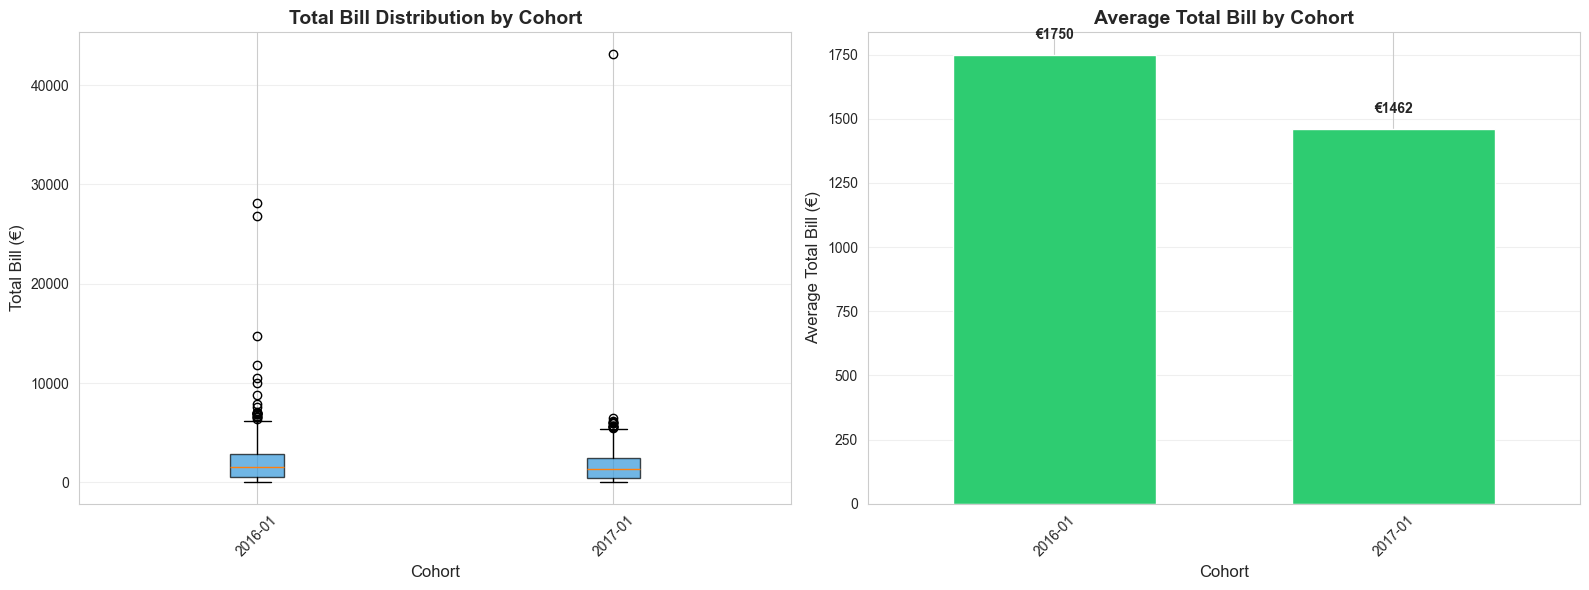


=== Total Bill Statistics by Connection Type ===
                  mean  median      std  count
fiber_or_adsl                                 
fiber          2287.65  2480.0  1251.91   4954
adsl           1389.80  1100.0  1208.13  15046


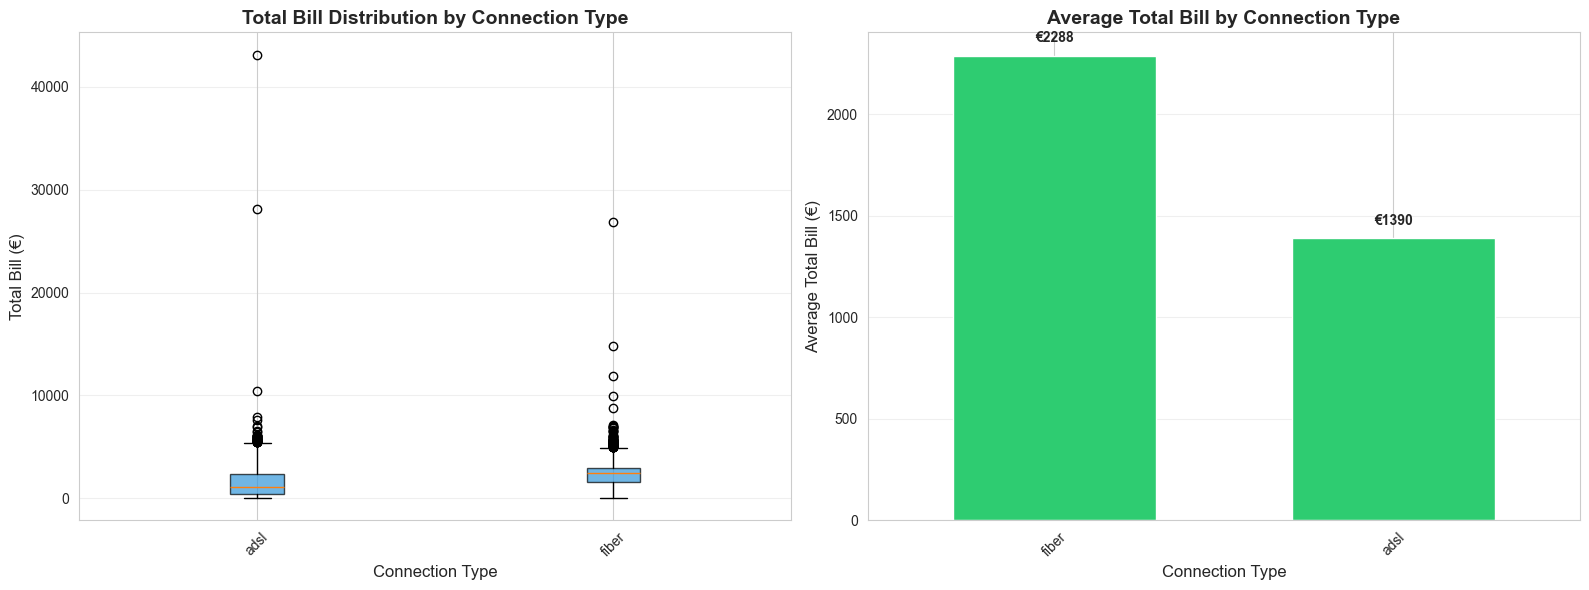


=== Total Bill Statistics by Churn Status ===
            mean  median     std  count
churned                                
0        2909.86  2820.0  958.86   6569
1         977.53   760.0  872.18  13431


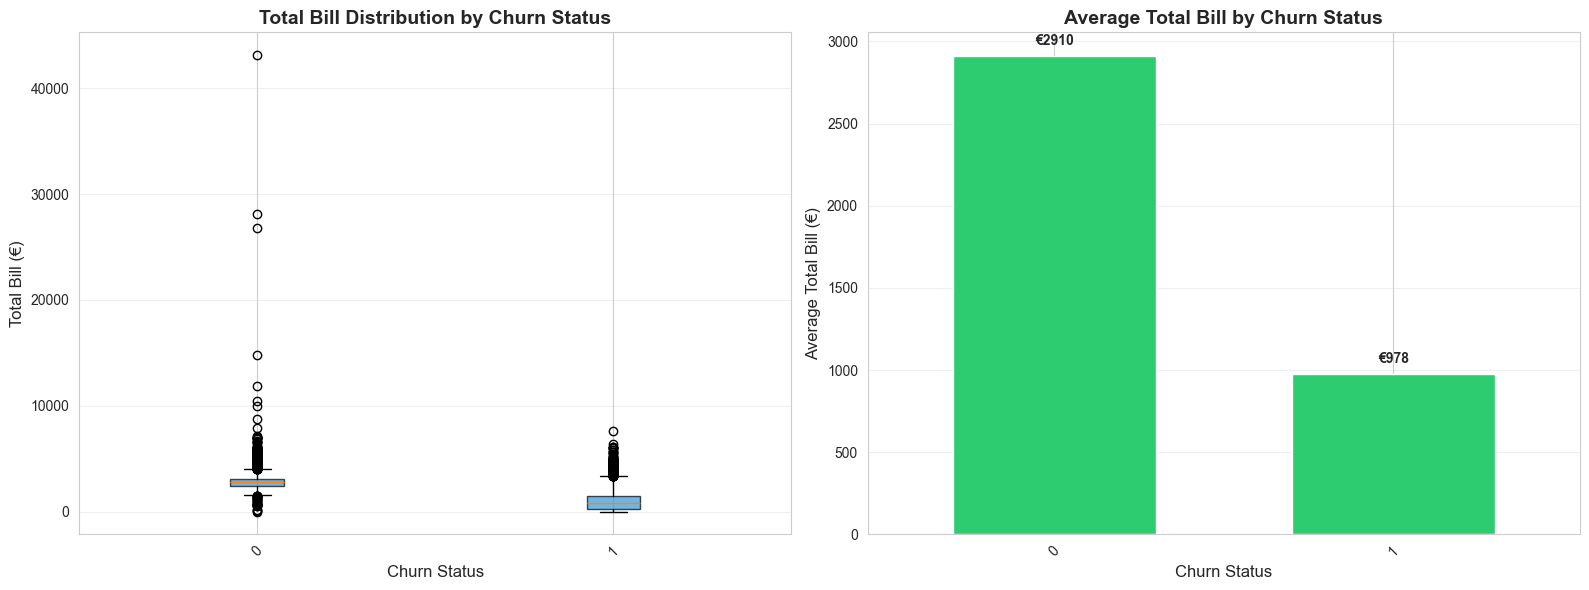


=== Total Bill Statistics by Retention Offer ===
                  mean  median      std  count
has_retention                                 
True           2517.43  2450.0   613.27    509
False          1588.56  1400.0  1283.50  19491


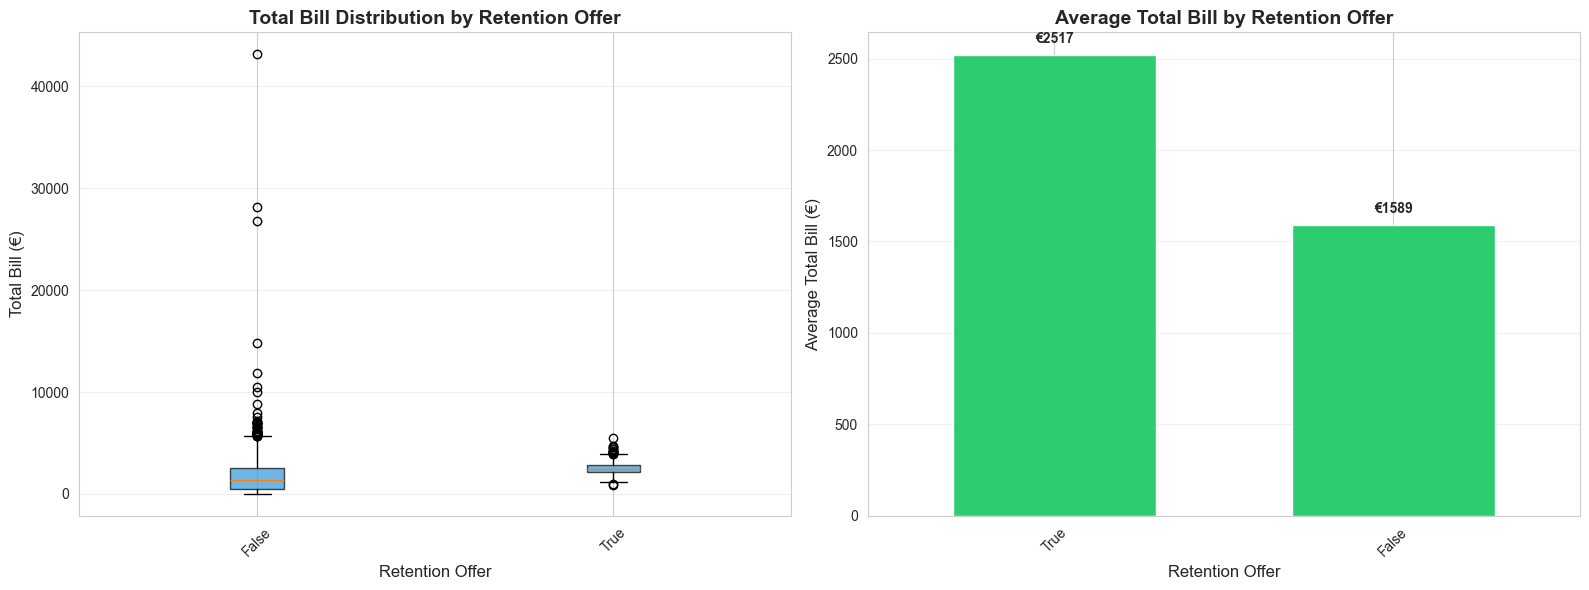


=== Total Bill Statistics by Acquisition Channel ===
                          mean  median      std  count
acquisition_channel                                   
outgoing call          2188.70  2480.0  1369.17     23
pos                    1868.36  2080.0  1291.06   2175
phone                  1832.29  1830.0  1270.99   6904
other                  1693.33  2490.0  1467.32      3
mail                   1662.72  1390.0  1270.34     81
online                 1616.05  1450.0  1217.14   6151
outgoing call - promo  1158.00   780.0  1244.40   4663


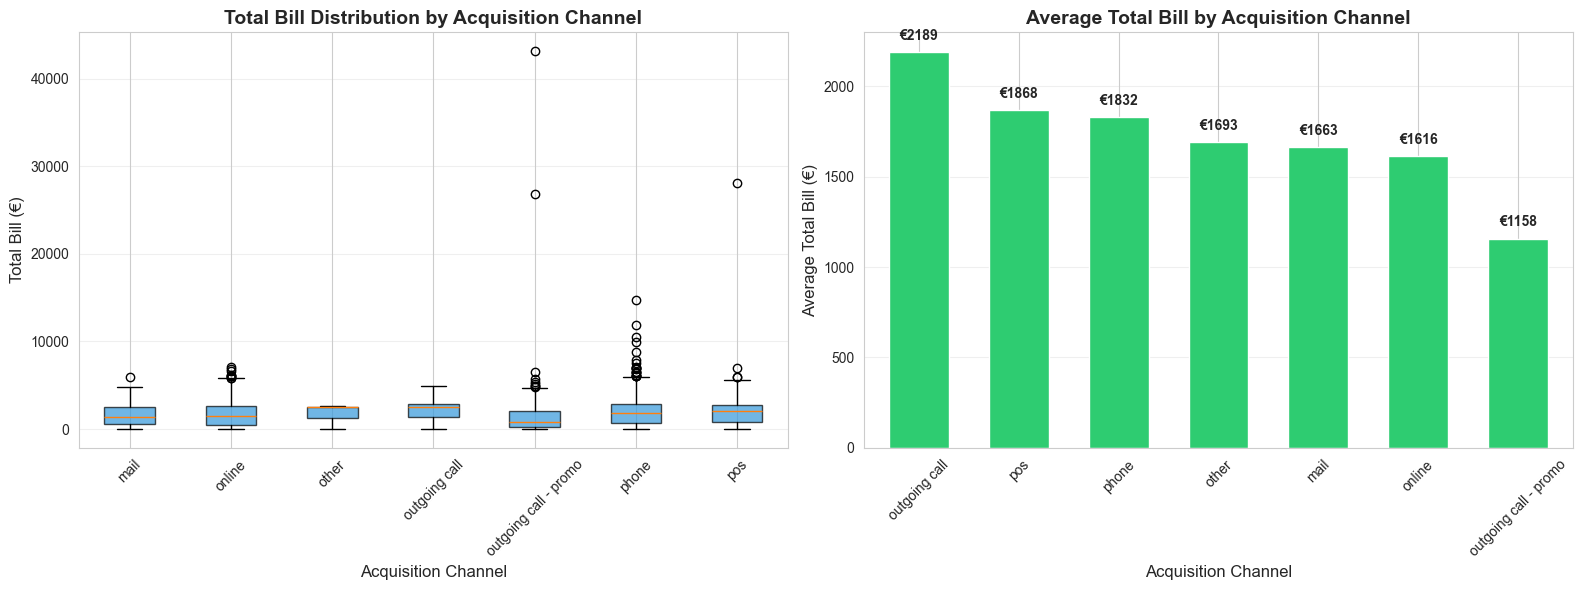

In [18]:
# Question 1a: Any difference between user groups?

def analyze_bill_by_group(df, group_col, group_name):
    """Analyze total bill by different groups"""
    group_stats = df.groupby(group_col)['total_bill'].agg(['mean', 'median', 'std', 'count']).round(2)
    group_stats = group_stats.sort_values('mean', ascending=False)
    
    print(f"\n=== Total Bill Statistics by {group_name} ===")
    print(group_stats)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Box plot
    groups = df[group_col].unique()
    data_to_plot = [df[df[group_col] == group]['total_bill'].values for group in sorted(groups)]
    
    bp = axes[0].boxplot(data_to_plot, labels=sorted(groups), patch_artist=True, vert=True)
    for patch in bp['boxes']:
        patch.set_facecolor('#3498db')
        patch.set_alpha(0.7)
    axes[0].set_title(f'Total Bill Distribution by {group_name}', fontsize=14, fontweight='bold')
    axes[0].set_ylabel('Total Bill (€)', fontsize=12)
    axes[0].set_xlabel(group_name, fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Bar chart of means
    group_stats['mean'].plot(kind='bar', ax=axes[1], color='#2ecc71', width=0.6)
    axes[1].set_title(f'Average Total Bill by {group_name}', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Average Total Bill (€)', fontsize=12)
    axes[1].set_xlabel(group_name, fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, v in enumerate(group_stats['mean']):
        axes[1].text(i, v + 50, f'€{v:.0f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return group_stats

# Analyze by cohort
cohort_bill = analyze_bill_by_group(df_processed, 'recruit_year_month', 'Cohort')

# Analyze by connection type
fiber_bill = analyze_bill_by_group(df_processed, 'fiber_or_adsl', 'Connection Type')

# Analyze by churn status
churn_bill = analyze_bill_by_group(df_processed, 'churned', 'Churn Status')

# Analyze by retention offer
retention_bill = analyze_bill_by_group(df_processed, 'has_retention', 'Retention Offer')

# Analyze by acquisition channel
channel_bill = analyze_bill_by_group(df_processed, 'acquisition_channel', 'Acquisition Channel')


### 5.3. Billing Evolution with Tenure


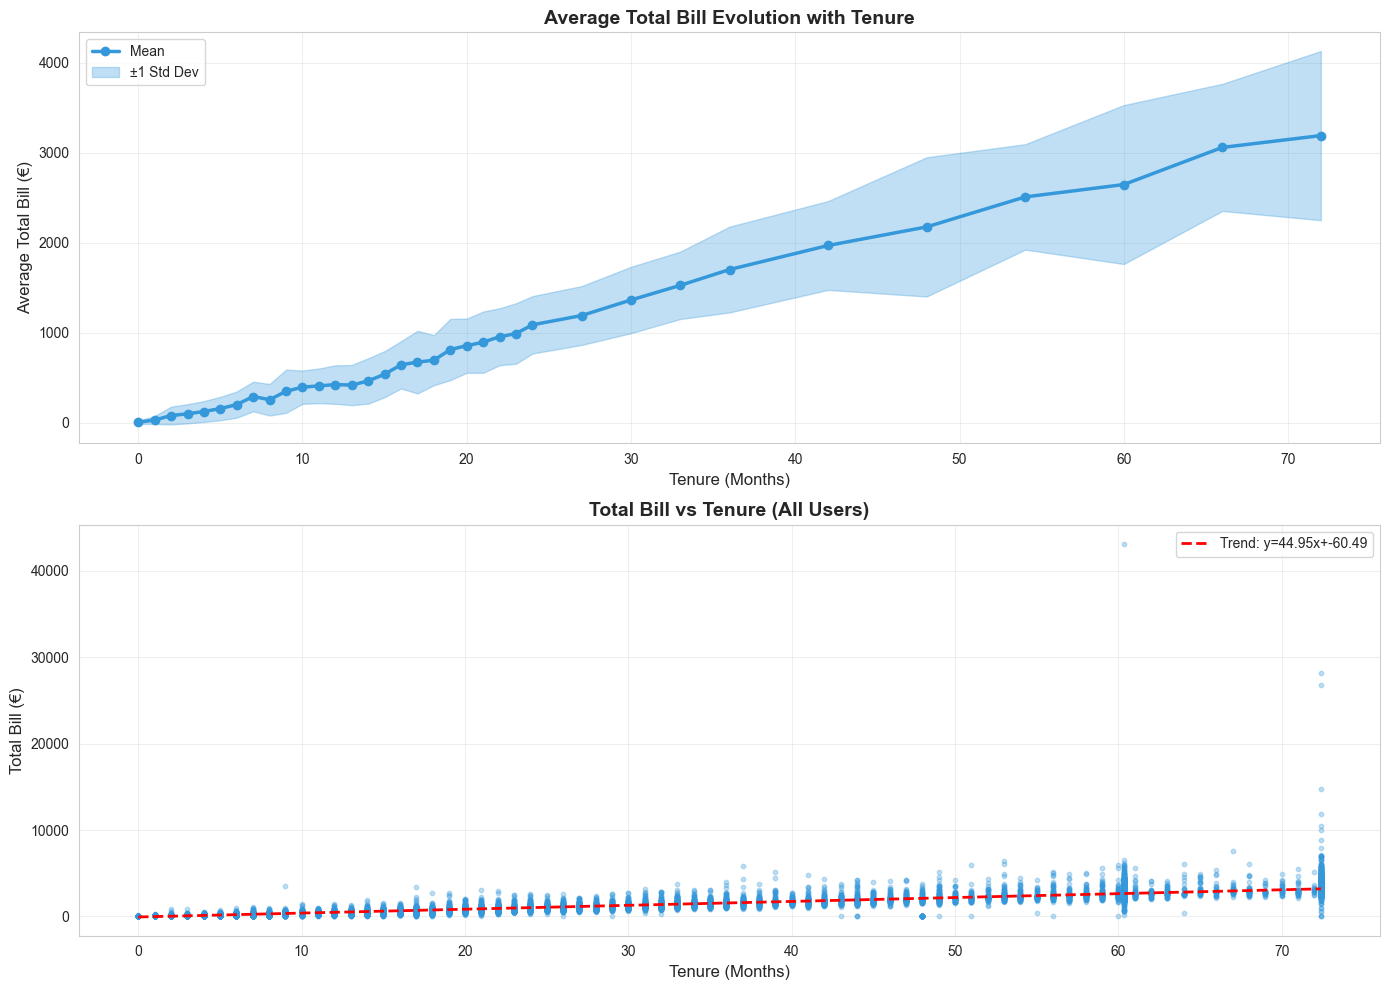

=== Billing Evolution Analysis ===

Average monthly revenue rate: €inf
Median monthly revenue rate: €41.38

=== Early vs Late Tenure Comparison ===
Average monthly rate (≤12 months): €inf
Average monthly rate (>36 months): €43.97


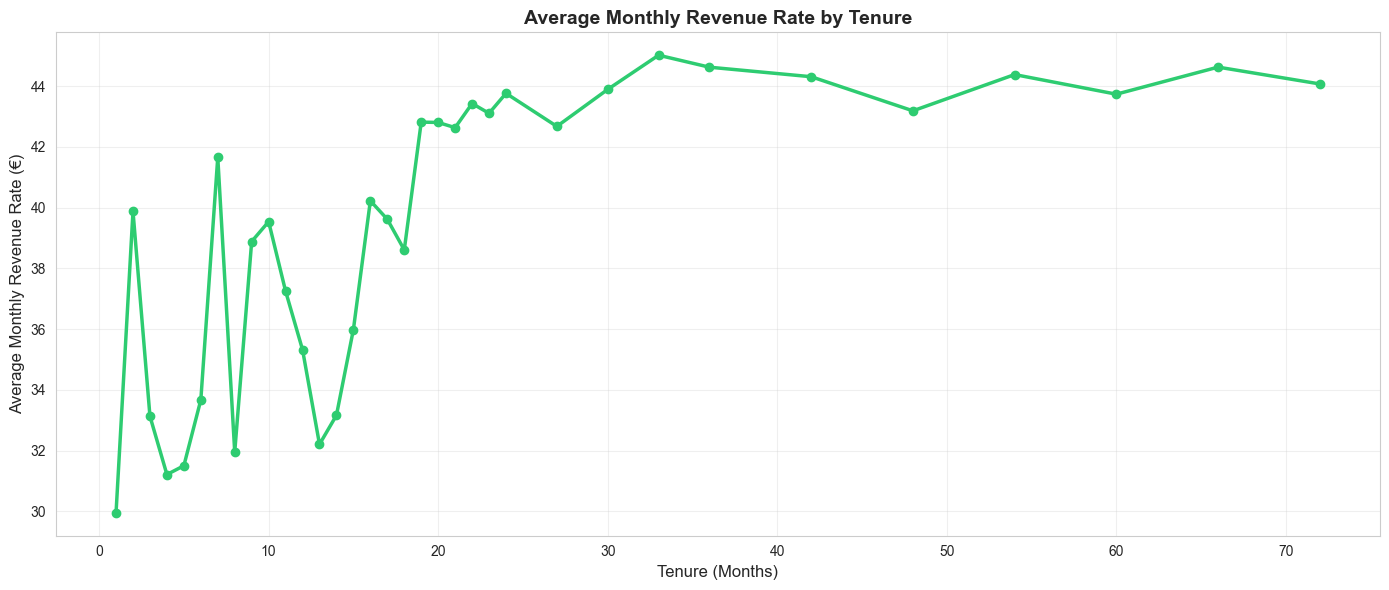

In [19]:
# Question 2: How does total bill evolve with tenure?
# Create tenure bins and analyze average bill

# Create tenure bins (monthly for first 24 months, then quarterly)
def create_tenure_bins(tenure_months):
    """Create tenure bins for analysis"""
    if tenure_months <= 24:
        return int(tenure_months)
    elif tenure_months <= 36:
        return int((tenure_months // 3) * 3)  # Round to nearest 3 months
    else:
        return int((tenure_months // 6) * 6)  # Round to nearest 6 months

df_processed['tenure_bin'] = df_processed['tenure_months'].apply(create_tenure_bins)

# Group by tenure bins and calculate average bill
bill_by_tenure = df_processed.groupby('tenure_bin')['total_bill'].agg(['mean', 'median', 'count', 'std']).reset_index()
bill_by_tenure = bill_by_tenure[bill_by_tenure['count'] >= 10]  # Filter out bins with too few users

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Line plot of average bill by tenure
axes[0].plot(bill_by_tenure['tenure_bin'], bill_by_tenure['mean'], 
            marker='o', linewidth=2.5, markersize=6, color='#3498db', label='Mean')
axes[0].fill_between(bill_by_tenure['tenure_bin'], 
                     bill_by_tenure['mean'] - bill_by_tenure['std'],
                     bill_by_tenure['mean'] + bill_by_tenure['std'],
                     alpha=0.3, color='#3498db', label='±1 Std Dev')
axes[0].set_title('Average Total Bill Evolution with Tenure', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure (Months)', fontsize=12)
axes[0].set_ylabel('Average Total Bill (€)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot with trend line
axes[1].scatter(df_processed['tenure_months'], df_processed['total_bill'], 
               alpha=0.3, s=10, color='#3498db')
# Add trend line
z = np.polyfit(df_processed['tenure_months'], df_processed['total_bill'], 1)
p = np.poly1d(z)
axes[1].plot(df_processed['tenure_months'].sort_values(), 
            p(df_processed['tenure_months'].sort_values()), 
            "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
axes[1].set_title('Total Bill vs Tenure (All Users)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tenure (Months)', fontsize=12)
axes[1].set_ylabel('Total Bill (€)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate monthly revenue rate (approximate)
df_processed['monthly_revenue_rate'] = df_processed['total_bill'] / df_processed['tenure_months']
monthly_rate_by_tenure = df_processed.groupby('tenure_bin')['monthly_revenue_rate'].mean().reset_index()

print("=== Billing Evolution Analysis ===")
print(f"\nAverage monthly revenue rate: €{df_processed['monthly_revenue_rate'].mean():.2f}")
print(f"Median monthly revenue rate: €{df_processed['monthly_revenue_rate'].median():.2f}")

# Compare early vs late tenure
early_tenure = df_processed[df_processed['tenure_months'] <= 12]
late_tenure = df_processed[df_processed['tenure_months'] > 36]

print("\n=== Early vs Late Tenure Comparison ===")
print(f"Average monthly rate (≤12 months): €{early_tenure['monthly_revenue_rate'].mean():.2f}")
print(f"Average monthly rate (>36 months): €{late_tenure['monthly_revenue_rate'].mean():.2f}")

# Visualization of monthly revenue rate
plt.figure(figsize=(14, 6))
plt.plot(monthly_rate_by_tenure['tenure_bin'], monthly_rate_by_tenure['monthly_revenue_rate'], 
         marker='o', linewidth=2.5, markersize=6, color='#2ecc71')
plt.title('Average Monthly Revenue Rate by Tenure', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Average Monthly Revenue Rate (€)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 6.2. Retention Offer Impact Analysis


=== Retention Offer Impact ===
               churned_mean  churned_sum  churned_count  tenure_months_mean  \
has_retention                                                                 
False                  0.68        13301          19491               36.55   
True                   0.26          130            509               62.48   

               total_bill_mean  monthly_revenue_rate_mean  
has_retention                                              
False                  1588.56                        inf  
True                   2517.43                      40.29  


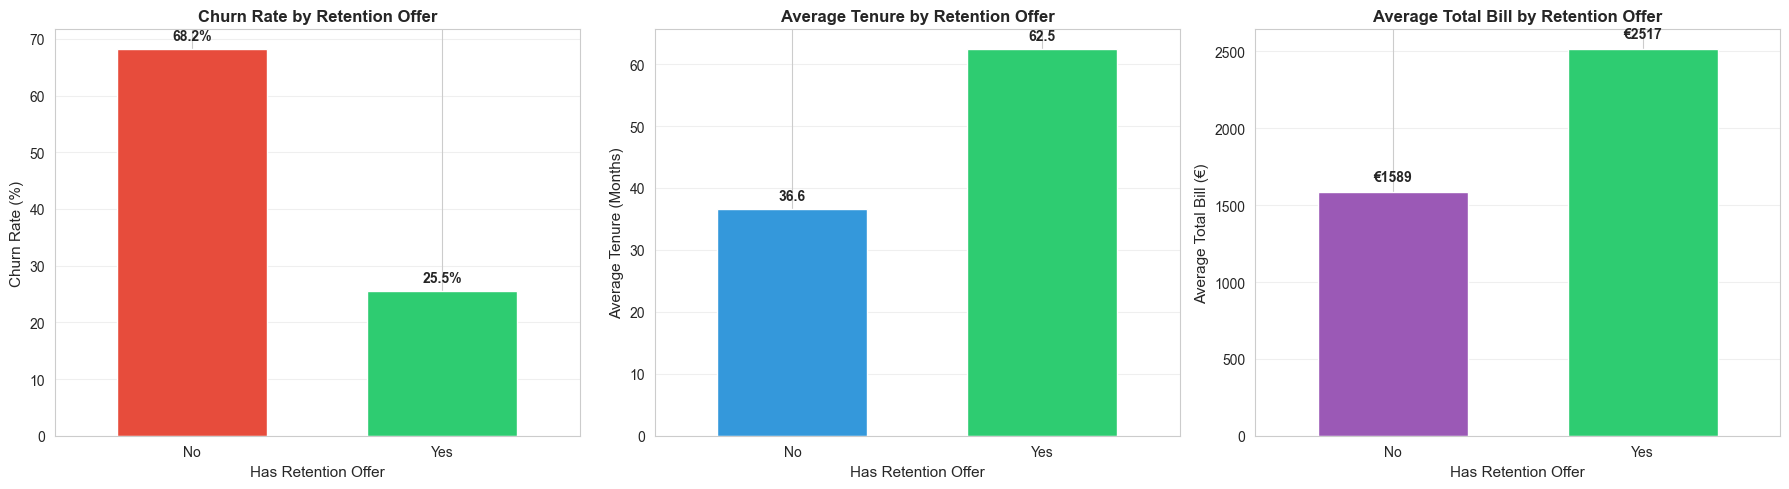

In [21]:
# Analyze the impact of retention offers
retention_analysis = df_processed.groupby('has_retention').agg({
    'churned': ['mean', 'sum', 'count'],
    'tenure_months': 'mean',
    'total_bill': 'mean',
    'monthly_revenue_rate': 'mean'
}).round(2)

retention_analysis.columns = ['_'.join(col).strip() for col in retention_analysis.columns.values]
print("=== Retention Offer Impact ===")
print(retention_analysis)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Churn rate
churn_by_retention = df_processed.groupby('has_retention')['churned'].mean() * 100
churn_by_retention.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'], width=0.6)
axes[0].set_title('Churn Rate by Retention Offer', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)', fontsize=11)
axes[0].set_xlabel('Has Retention Offer', fontsize=11)
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(churn_by_retention.values):
    axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# Average tenure
tenure_by_retention = df_processed.groupby('has_retention')['tenure_months'].mean()
tenure_by_retention.plot(kind='bar', ax=axes[1], color=['#3498db', '#2ecc71'], width=0.6)
axes[1].set_title('Average Tenure by Retention Offer', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Tenure (Months)', fontsize=11)
axes[1].set_xlabel('Has Retention Offer', fontsize=11)
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(tenure_by_retention.values):
    axes[1].text(i, v + 1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

# Average total bill
bill_by_retention = df_processed.groupby('has_retention')['total_bill'].mean()
bill_by_retention.plot(kind='bar', ax=axes[2], color=['#9b59b6', '#2ecc71'], width=0.6)
axes[2].set_title('Average Total Bill by Retention Offer', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Average Total Bill (€)', fontsize=11)
axes[2].set_xlabel('Has Retention Offer', fontsize=11)
axes[2].set_xticklabels(['No', 'Yes'], rotation=0)
axes[2].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(bill_by_retention.values):
    axes[2].text(i, v + 50, f'€{v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


### 6.3. Offer and Sub-offer Analysis


=== Offer Analysis ===
                                        churned_mean  churned_count  \
offer                                                                 
#8:Freebox Revolution 2999eur                   0.82           5815   
#11:Freebox Revolution with TV 3999eur          0.61          14185   

                                        total_bill_mean  tenure_months_mean  \
offer                                                                         
#8:Freebox Revolution 2999eur                    960.34               25.12   
#11:Freebox Revolution with TV 3999eur          1879.43               42.17   

                                       fiber_or_adsl_<lambda>  
offer                                                          
#8:Freebox Revolution 2999eur                            adsl  
#11:Freebox Revolution with TV 3999eur                   adsl  

=== Top 10 Sub-offers by Churn Rate ===
                                                    churned_mean  \
sub_offer 

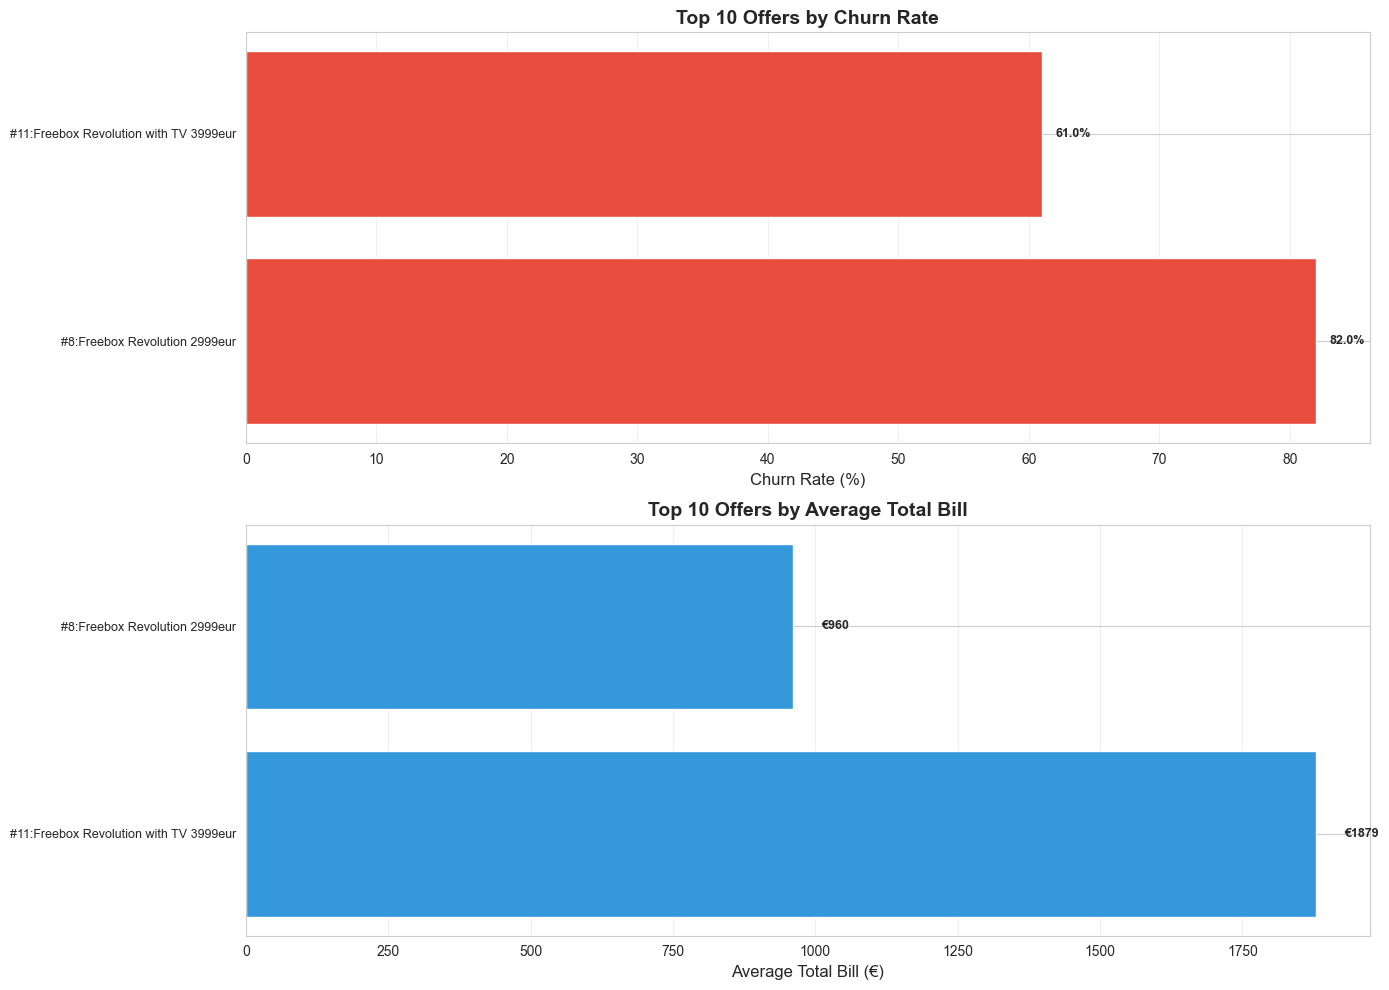

In [22]:
# Analyze different offers and sub-offers
offer_analysis = df_processed.groupby('offer').agg({
    'churned': ['mean', 'count'],
    'total_bill': 'mean',
    'tenure_months': 'mean',
    'fiber_or_adsl': lambda x: x.value_counts().index[0]  # Most common connection type
}).round(2)

offer_analysis.columns = ['_'.join(col).strip() if col[1] else col[0] for col in offer_analysis.columns.values]
offer_analysis = offer_analysis.sort_values('churned_mean', ascending=False)

print("=== Offer Analysis ===")
print(offer_analysis)

# Top sub-offers by churn
sub_offer_analysis = df_processed.groupby('sub_offer').agg({
    'churned': ['mean', 'count'],
    'total_bill': 'mean',
    'tenure_months': 'mean'
}).round(2)

sub_offer_analysis.columns = ['_'.join(col).strip() if col[1] else col[0] for col in sub_offer_analysis.columns.values]
sub_offer_analysis = sub_offer_analysis.sort_values('churned_mean', ascending=False)

print("\n=== Top 10 Sub-offers by Churn Rate ===")
print(sub_offer_analysis.head(10))

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Churn rate by offer
top_offers = offer_analysis.head(10)
axes[0].barh(range(len(top_offers)), top_offers['churned_mean'] * 100, color='#e74c3c')
axes[0].set_yticks(range(len(top_offers)))
axes[0].set_yticklabels([label[:40] + '...' if len(label) > 40 else label for label in top_offers.index], 
                         fontsize=9)
axes[0].set_xlabel('Churn Rate (%)', fontsize=12)
axes[0].set_title('Top 10 Offers by Churn Rate', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(top_offers['churned_mean'] * 100):
    axes[0].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

# Average bill by offer
top_offers_bill = offer_analysis.nlargest(10, 'total_bill_mean')
axes[1].barh(range(len(top_offers_bill)), top_offers_bill['total_bill_mean'], color='#3498db')
axes[1].set_yticks(range(len(top_offers_bill)))
axes[1].set_yticklabels([label[:40] + '...' if len(label) > 40 else label for label in top_offers_bill.index], 
                         fontsize=9)
axes[1].set_xlabel('Average Total Bill (€)', fontsize=12)
axes[1].set_title('Top 10 Offers by Average Total Bill', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(top_offers_bill['total_bill_mean']):
    axes[1].text(v + 50, i, f'€{v:.0f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()


In [23]:
# Create a summary of key findings
print("=" * 80)
print("KEY FINDINGS SUMMARY")
print("=" * 80)

print("\n1. COHORT SIZES:")
print(f"   - 2016-01 Cohort: {cohort_sizes['2016-01']:,} users")
print(f"   - 2017-01 Cohort: {cohort_sizes['2017-01']:,} users")
print(f"   - Total: {len(df_processed):,} users")

print("\n2. CHURN ANALYSIS:")
overall_churn_rate = (df_processed['churned'].sum() / len(df_processed)) * 100
print(f"   - Overall churn rate: {overall_churn_rate:.2f}%")
print(f"   - Users remaining in Jan 2022: {len(users_remaining):,} ({len(users_remaining)/len(df_processed)*100:.2f}%)")
print(f"   - Users churned: {len(users_churned):,} ({len(users_churned)/len(df_processed)*100:.2f}%)")
print(f"   - Average monthly churn rate (2016 cohort): {churn_rate_2016['churn_rate'].mean():.3f}%")

print("\n3. BILLING ANALYSIS:")
print(f"   - Average total bill: €{df_processed['total_bill'].mean():.2f}")
print(f"   - Median total bill: €{df_processed['total_bill'].median():.2f}")
print(f"   - Average monthly revenue rate: €{df_processed['monthly_revenue_rate'].mean():.2f}")

print("\n4. RETENTION OFFER IMPACT:")
retention_churn = df_processed[df_processed['has_retention'] == True]['churned'].mean() * 100
no_retention_churn = df_processed[df_processed['has_retention'] == False]['churned'].mean() * 100
print(f"   - Churn rate with retention offer: {retention_churn:.2f}%")
print(f"   - Churn rate without retention offer: {no_retention_churn:.2f}%")
print(f"   - Difference: {no_retention_churn - retention_churn:.2f} percentage points")

print("\n5. CONNECTION TYPE:")
fiber_churn = df_processed[df_processed['fiber_or_adsl'] == 'fiber']['churned'].mean() * 100
adsl_churn = df_processed[df_processed['fiber_or_adsl'] == 'adsl']['churned'].mean() * 100
print(f"   - Fiber churn rate: {fiber_churn:.2f}%")
print(f"   - ADSL churn rate: {adsl_churn:.2f}%")

print("\n" + "=" * 80)


KEY FINDINGS SUMMARY

1. COHORT SIZES:
   - 2016-01 Cohort: 10,452 users
   - 2017-01 Cohort: 9,548 users
   - Total: 20,000 users

2. CHURN ANALYSIS:
   - Overall churn rate: 67.16%
   - Users remaining in Jan 2022: 6,569 (32.84%)
   - Users churned: 13,431 (67.16%)
   - Average monthly churn rate (2016 cohort): 1.547%

3. BILLING ANALYSIS:
   - Average total bill: €1612.20
   - Median total bill: €1465.00
   - Average monthly revenue rate: €inf

4. RETENTION OFFER IMPACT:
   - Churn rate with retention offer: 25.54%
   - Churn rate without retention offer: 68.24%
   - Difference: 42.70 percentage points

5. CONNECTION TYPE:
   - Fiber churn rate: 37.59%
   - ADSL churn rate: 76.89%



In [30]:
## 7. Save Processed Dataset for ML

# Save the processed dataset for future ML prediction tasks
# We'll save it in multiple formats for flexibility

# 1. Save as CSV (most compatible, easy to read)
csv_filename = 'processed_data_for_ml.csv'
df_processed.to_csv(csv_filename, index=False)
print(f"✓ Dataset saved as CSV: {csv_filename}")
print(f"  Shape: {df_processed.shape}")
print(f"  Columns: {list(df_processed.columns)}")

# 2. Save as Parquet (preserves data types, more efficient)
try:
    parquet_filename = 'processed_data_for_ml.parquet'
    df_processed.to_parquet(parquet_filename, index=False)
    print(f"\n✓ Dataset saved as Parquet: {parquet_filename}")
except Exception as e:
    print(f"\n⚠ Could not save as Parquet: {e}")
    print("  (Parquet requires pyarrow or fastparquet - install with: pip install pyarrow)")

# 3. Save as Pickle (preserves exact Python objects, fastest to load)
import pickle
pickle_filename = 'processed_data_for_ml.pkl'
with open(pickle_filename, 'wb') as f:
    pickle.dump(df_processed, f)
print(f"\n✓ Dataset saved as Pickle: {pickle_filename}")

# Display summary of saved dataset
print("\n" + "="*80)
print("DATASET SAVED FOR ML PREDICTION")
print("="*80)
print(f"\nTotal records: {len(df_processed):,}")
print(f"Total features: {len(df_processed.columns)}")
print(f"\nTarget variable: 'churned' (1 = churned, 0 = active)")
print(f"  - Churned: {df_processed['churned'].sum():,} ({df_processed['churned'].mean()*100:.2f}%)")
print(f"  - Active: {(df_processed['churned'] == 0).sum():,} ({(df_processed['churned'] == 0).mean()*100:.2f}%)")

print("\nKey features for ML:")
feature_cols = ['acquisition_channel', 'fiber_or_adsl', 'has_retention', 'offer', 
                'sub_offer', 'recruit_year_month', 'tenure_months', 'total_bill', 
                'monthly_revenue_rate', 'churned']
print(f"  - Categorical: acquisition_channel, fiber_or_adsl, has_retention, offer, sub_offer, recruit_year_month")
print(f"  - Numerical: tenure_months, total_bill, monthly_revenue_rate")
print(f"  - Target: churned")

print("\n" + "="*80)
print("Files ready for ML model training!")
print("="*80)


✓ Dataset saved as CSV: processed_data_for_ml.csv
  Shape: (20000, 15)
  Columns: ['acquisition_channel', 'cancel_year_month', 'duration_month', 'fiber_or_adsl', 'has_retention', 'offer', 'recruit_year_month', 'sub_offer', 'total_bill', 'churned', 'recruit_date', 'cancel_date', 'tenure_months', 'tenure_bin', 'monthly_revenue_rate']

⚠ Could not save as Parquet: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.
  (Parquet requires pyarrow or fastparquet - install with: pip install pyarrow)

✓ Dataset saved as Pickle: processed_data_for_ml.pkl

DATASET SAVED FOR ML PREDICTION

Total records: